In [2]:
#%matplotlib inline
# Import libraries
import betterplotlib as bpl
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 22})
matplotlib.rcParams.update({'figure.autolayout': True})

# x = "GAGCTGGAGGCTTAGCAGGACCAAGAG"

In [ ]:
#len(x)

BAMS local

In [5]:
%%bash
n=79163
#mkdir /home/genetix/Escritorio/coberturas/${n}
bedtools bamtobed -i /home/genetix/Escritorio/coberturas/${n}/${n}*.bam > /home/genetix/Escritorio/coberturas/${n}/${n}.bed
bedtools coverage -a /home/genetix/Escritorio/exons.bed -b /home/genetix/Escritorio/coberturas/${n}/${n}.bed -d -split > /home/genetix/Escritorio/coberturas/${n}/exon_$n.txt

BAM MiSEQ

In [3]:
%%bash
n=79202
libreria='190917UB'
mkdir /home/genetix/Escritorio/coberturas/${n}
bedtools bamtobed -i /run/user/1000/gvfs/smb-share:server=qnap24tb.local,share=bioinformatica/CorridasTSO2019/${libreria}/${n}*.bam > /home/genetix/Escritorio/coberturas/${n}/${n}.bed
bedtools coverage -a /home/genetix/Escritorio/exons.bed -b /home/genetix/Escritorio/coberturas/${n}/${n}.bed -d -split > /home/genetix/Escritorio/coberturas/${n}/exon_$n.txt

##### BAM basespace

In [5]:
%%bash
#Codigo de muestra
n=79191
#mkdir /home/genetix/Escritorio/coberturas/${n}
##cp /home/genetix/Documentos/${n}/GENES.txt /home/genetix/Escritorio/coberturas/${n} 
#Proyecto
p='17092019' 
bedtools bamtobed -i /home/genetix/BaseSpace_Mount/Projects/${p}/AppResults/${n}/Files/${n}*.bam > /home/genetix/Escritorio/coberturas/${n}/${n}.bed
bedtools coverage -a /home/genetix/Escritorio/exons.bed -b /home/genetix/Escritorio/coberturas/${n}/${n}.bed -d -split > /home/genetix/Escritorio/coberturas/${n}/exon_$n.txt

In [ ]:
#dfz = pd.read_csv('/home/genetix/Documentos/'+b+'/GENES.txt', sep ='\t')
#genes= dfz['Gene'].tolist()
#genes[0:10]

Copiar carpeta de genes

In [4]:
##### print('Confirme el código del paciente:')
b= input()
a= pd.read_csv('/home/genetix/Documentos/'+b+'/GENES.txt',header= None) 
GENES= a[0].tolist()
d1 = pd.read_csv('/home/genetix/Escritorio/GenesNames_sort_uniq', header = None )
genes1 = d1[0].tolist()
#for i in range(len(genes1)):
 #   genes1[i] = '^' + genes1[i]
GENES = [GENES.strip(' ') for GENES in GENES]
p =list(set(GENES)-(set(genes1)))
p[0:50]

 79202


[]

In [5]:
#b ='73899'
df = pd.read_csv('/home/genetix/Escritorio/coberturas/'+b+'/exon_'+b+'.txt', names = ["chr", "Start", "End", "Exon", "Pos_exon","Cov"], sep='\t')

In [6]:
#x =  pd.read_table('/home/biolinux/Documentos/64561_exoma/marfan.txt')

In [7]:
df.head() 

,chr,Start,End,Exon,Pos_exon,Cov
0,chr1,35138,35174,FAM138A_3,1,0
1,chr1,35138,35174,FAM138A_3,2,0
2,chr1,35138,35174,FAM138A_3,3,0
3,chr1,35138,35174,FAM138A_3,4,0
4,chr1,35138,35174,FAM138A_3,5,0


In [8]:
dup= a[a[0].duplicated() == True]

In [9]:
len(dup)

1

In [10]:
a = a.drop_duplicates()

In [11]:
#df1 = pd.read_csv('GENES')

In [12]:
#genes = x['Gene'].tolist()

In [13]:
#df1 = pd.read_excel('VAR RETT 62260.xlsx',1, header = None)
#df1

In [14]:
#a = df1.columns.get_values()
#genes = list(a)

In [15]:
#genes[0:10]

In [16]:
genes = a[0].tolist()
genes[0:10]

['ANO5',
 'CAPN3',
 'CAV3',
 'DAG1',
 'DNAJB6',
 'DYSF',
 'FKRP',
 'FKTN',
 'LAMA2',
 'LMNA']

In [17]:
#genes = ['DNAH1','DNAH5']

In [18]:
#genes = df2[0].tolist()

In [19]:
#genes = ["FGFR2","COL1A1","COL1A2"]

In [20]:
genes = [genes.strip(' ') for genes in genes]

In [21]:
for i in range(len(genes)):
    genes[i] = '^' + genes[i]

In [22]:
genes[0:5]

['^ANO5', '^CAPN3', '^CAV3', '^DAG1', '^DNAJB6']

In [23]:
#genes = ['BMP1','COL1A1','COL1A2','CRTAP','FKBP10','IFITM5','LAMB3','LEPRE1','PPIB','SERPINF1','SERPINH1','SP7']
genes_ = '_,'.join(map(str, genes))
g = genes_.split(',')
g[-1] = g[-1]+'_'

In [24]:
len(g)

27

In [25]:
g[0:10]

['^ANO5_',
 '^CAPN3_',
 '^CAV3_',
 '^DAG1_',
 '^DNAJB6_',
 '^DYSF_',
 '^FKRP_',
 '^FKTN_',
 '^LAMA2_',
 '^LMNA_']

In [26]:
#todos = df[df['Exon'].str.contains('^RPGR_')]

In [27]:
todos = df[df['Exon'].str.contains('|'.join(g))]

In [28]:
todos = todos.assign(Cov2 = todos.Cov.astype(bool))

In [29]:
#todos['Cov2']= todos.Cov2.astype(int)
todos.Cov2 = todos.Cov2.astype(int)

In [30]:
todos.head()

,chr,Start,End,Exon,Pos_exon,Cov,Cov2
561870,chr1,26126722,26126904,SEPN1_1,1,0,0
561871,chr1,26126722,26126904,SEPN1_1,2,0,0
561872,chr1,26126722,26126904,SEPN1_1,3,0,0
561873,chr1,26126722,26126904,SEPN1_1,4,0,0
561874,chr1,26126722,26126904,SEPN1_1,5,0,0


In [31]:
#todos.to_csv('prueba.txt', sep ='\t')

In [48]:
def grafico_media(m):
    x = todos[todos['Exon'].str.contains(m)]
    x1 = x[['Cov','Exon']].groupby('Exon').mean()
    x2 = x1.sort_values('Cov', ascending= True)
    plot = x2.plot(kind="bar",figsize=(50, 10), title = m , color = [('#41b9e1')]);plt.axhline(20, color='k');
    fig = plot.get_figure()
    fig.savefig('/home/genetix/Escritorio/coberturas/'+b+'/'+m+".png", bbox_inches=0)
    return x2

In [57]:
def porcentaje_cobertura(l):
    s = todos[todos['Exon'].str.contains(l)]
    s_1 = s[['Cov2','Exon']].groupby('Exon').mean()*100
    y1 = s_1.sort_values('Cov2', ascending= True)
    plot = y1.plot(kind="bar",figsize=(40, 10), title = l ,color = [('#6633FF')]);plt.axhline(100, color='r');
    fig = plot.get_figure()
    plot.set(xlabel="Exon", ylabel="Porcentaje de Cobertura")
    fig.savefig('/home/genetix/Escritorio/coberturas/'+b+'/'+l+ "P.png", bbox_inches=0)
    return y1

In [41]:
def profundidad(c):
    z = todos[todos['Exon'].str.contains('(?:\\s|^)'+c+'(?:\\s|$)')]
    plt.figure(figsize=(20,10))
    z.plot(kind='area', x='Pos_exon', y='Cov',figsize=(40, 10),title = c ,color = [('#088A08')]);plt.axhline(10, color='r');plt.axhline(30, color='k')
    plt.xlim(left=1)
    plt.savefig('/home/genetix/Escritorio/coberturas/'+b+'/'+c+'.png', bbox_inches=None , pad_inches=0)
    return z

In [35]:
#T = todos[todos['Exon'].str.contains('(?:\\s|^)SHOX_5_chrY(?:\\s|$)')]

In [36]:
#genes

In [37]:
#a = todos[todos['Exon'].str.contains('SHOX_5_chrY')]
#a.to_csv('example.csv', index=False)

/home/genetix/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/genetix/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/genetix/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicit

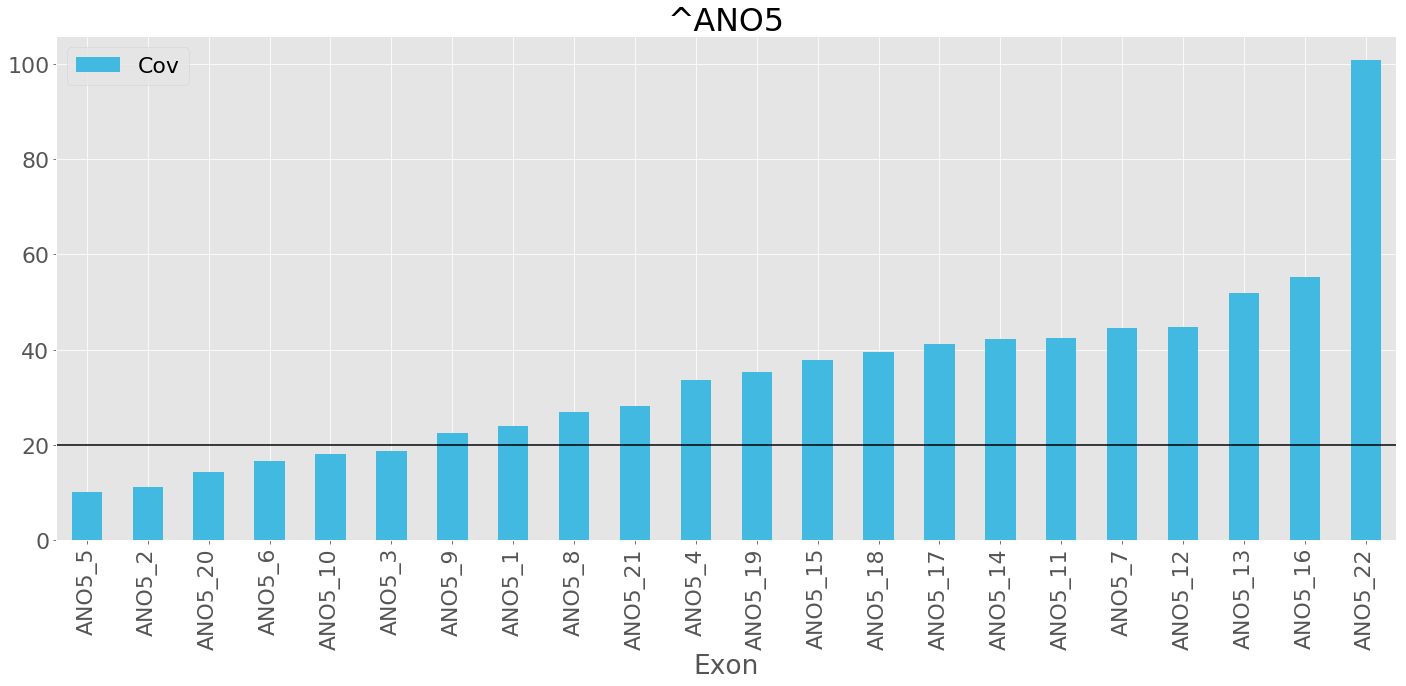

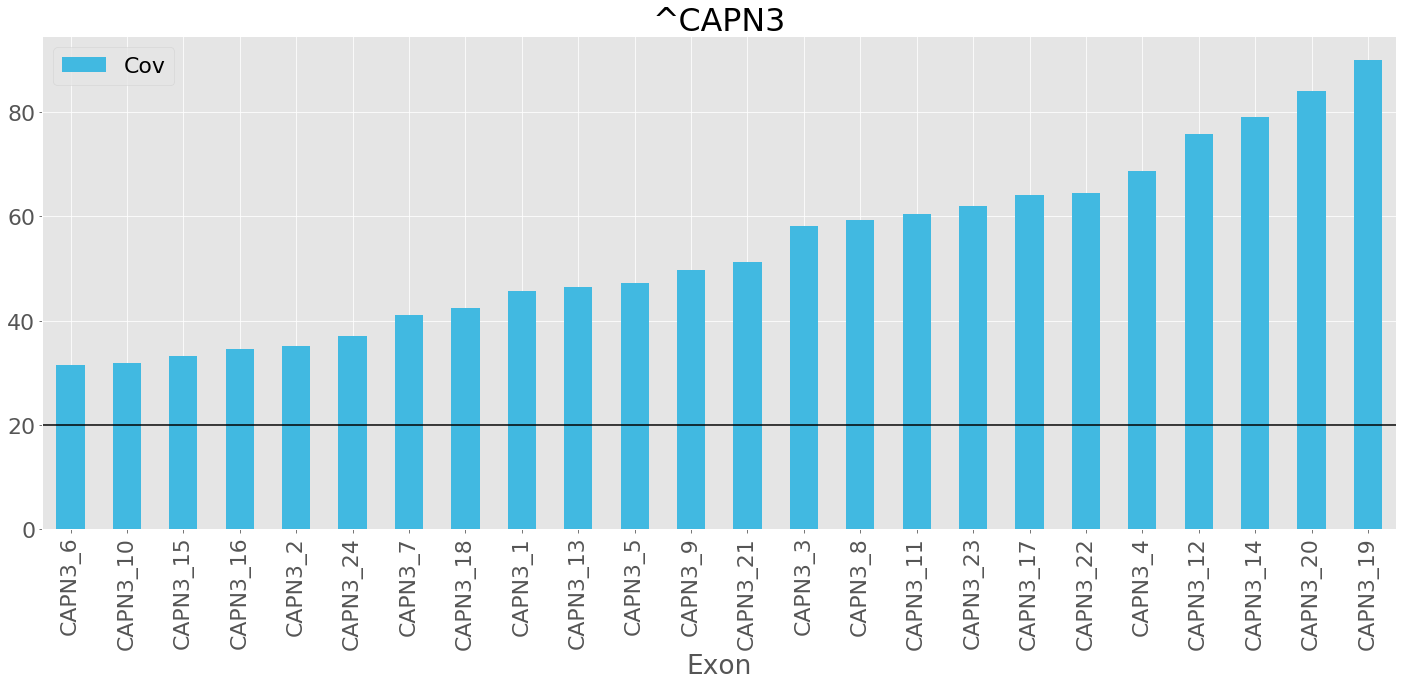

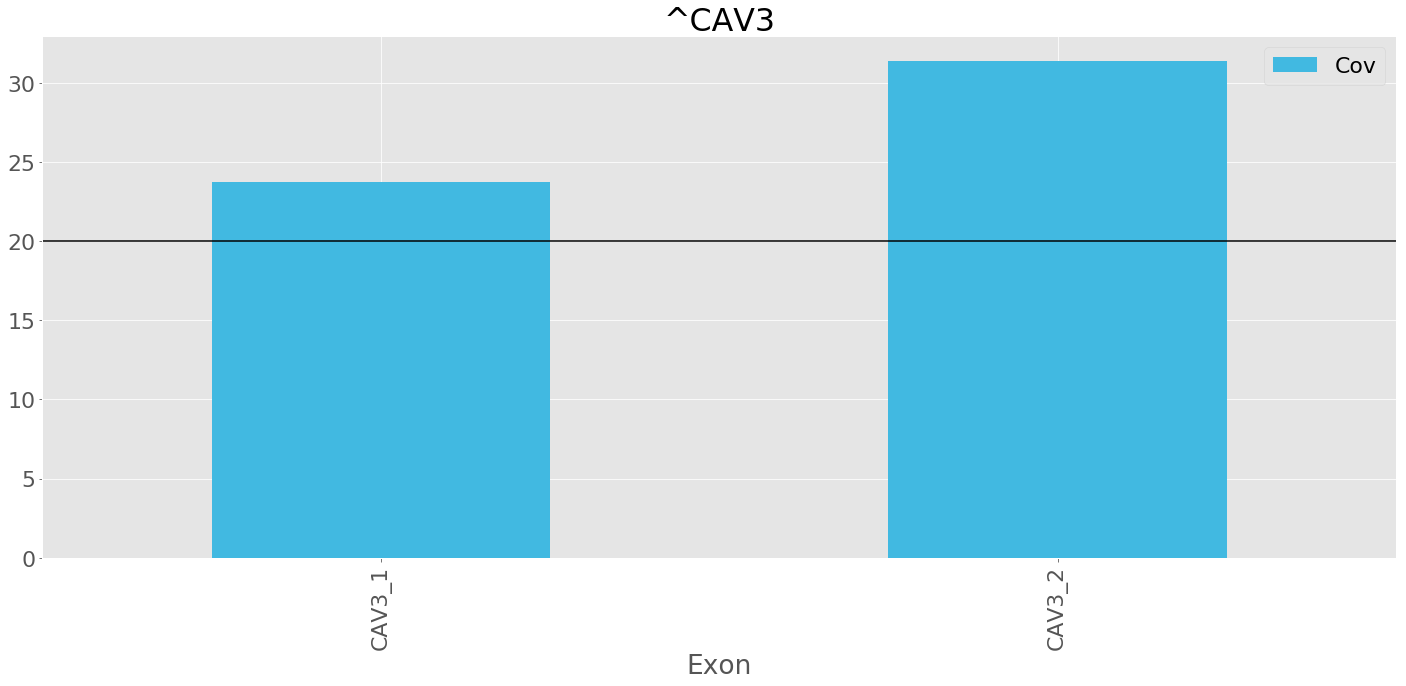

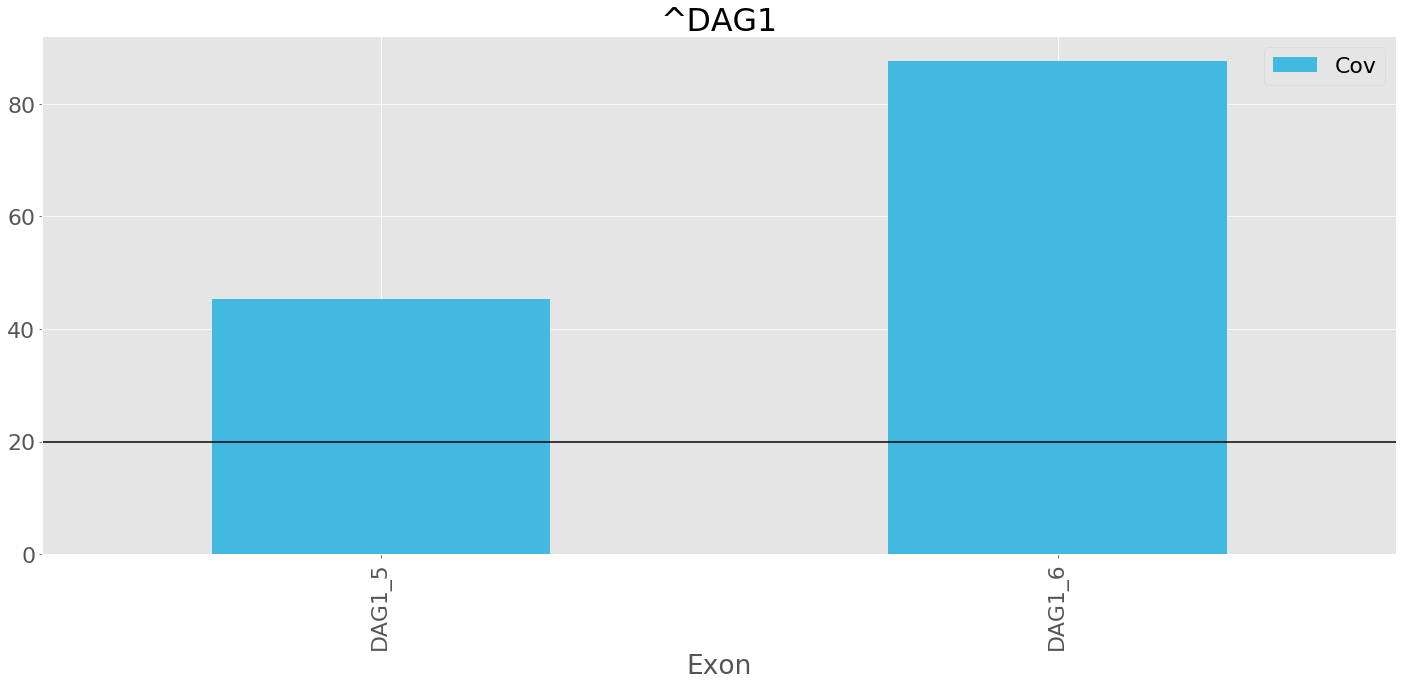

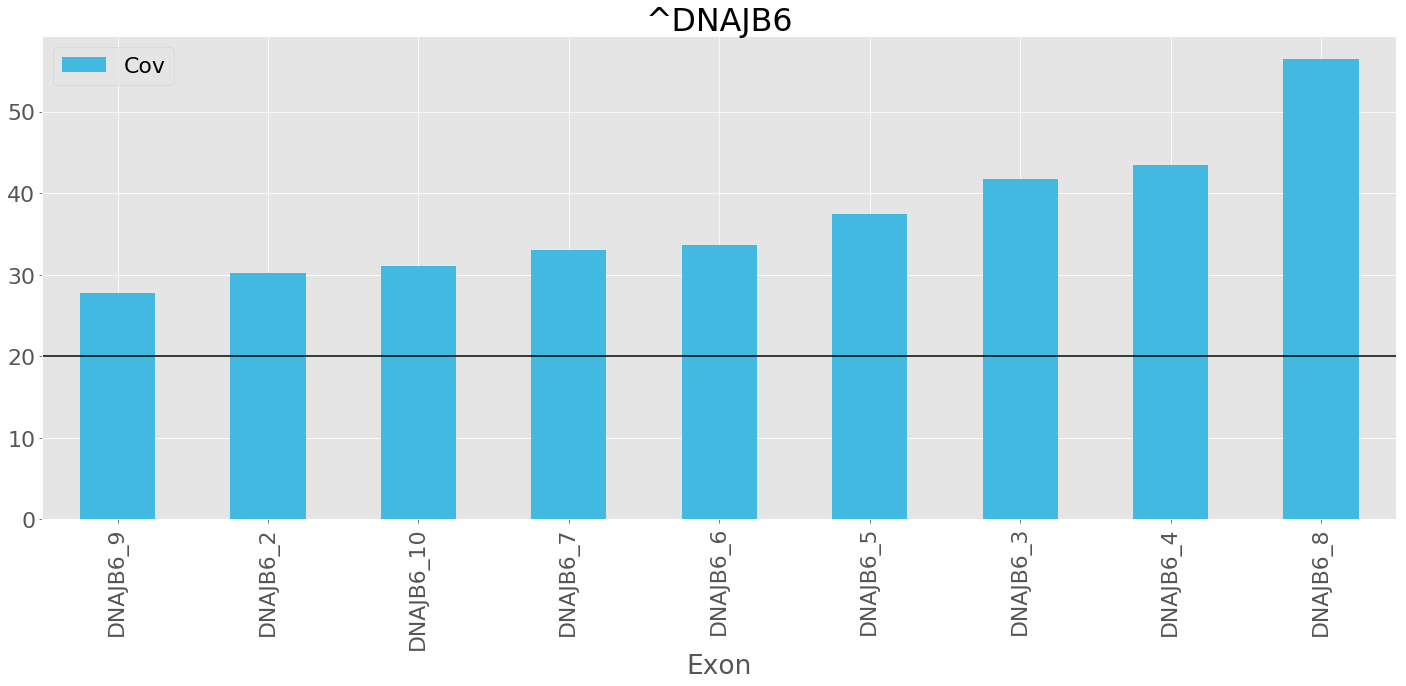

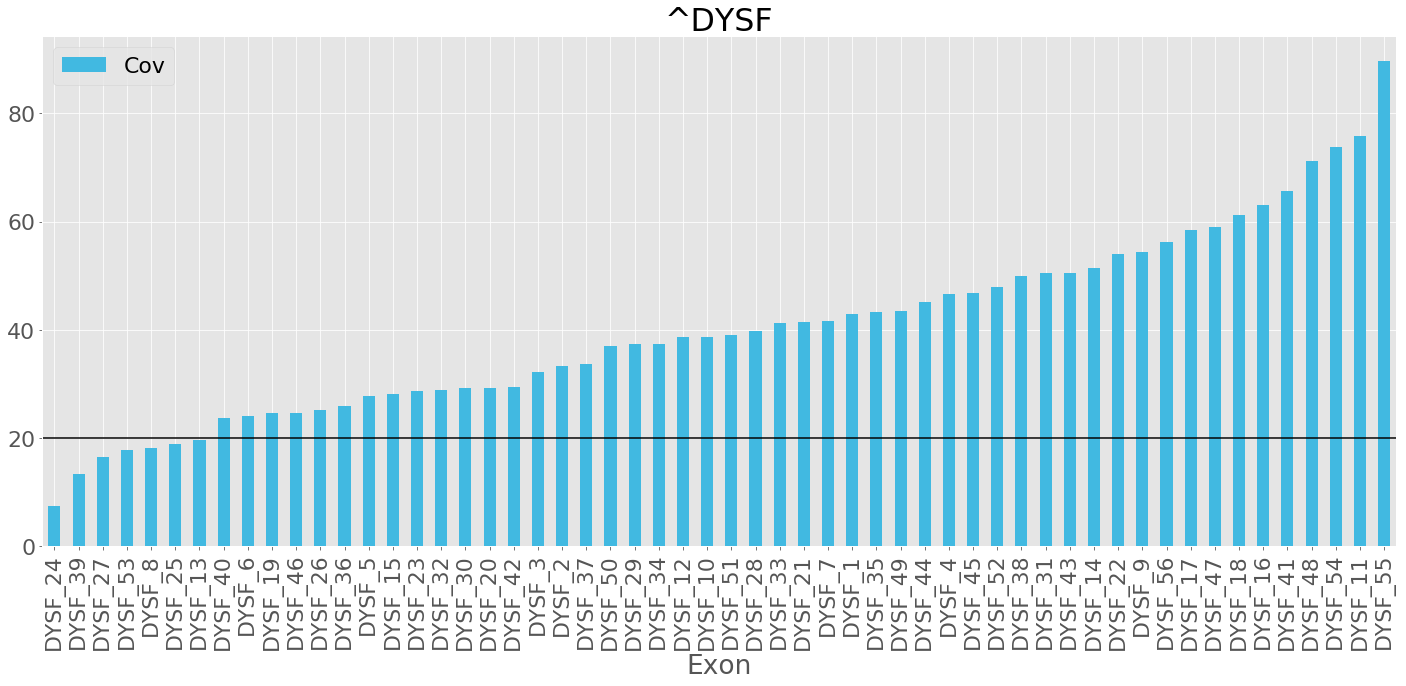

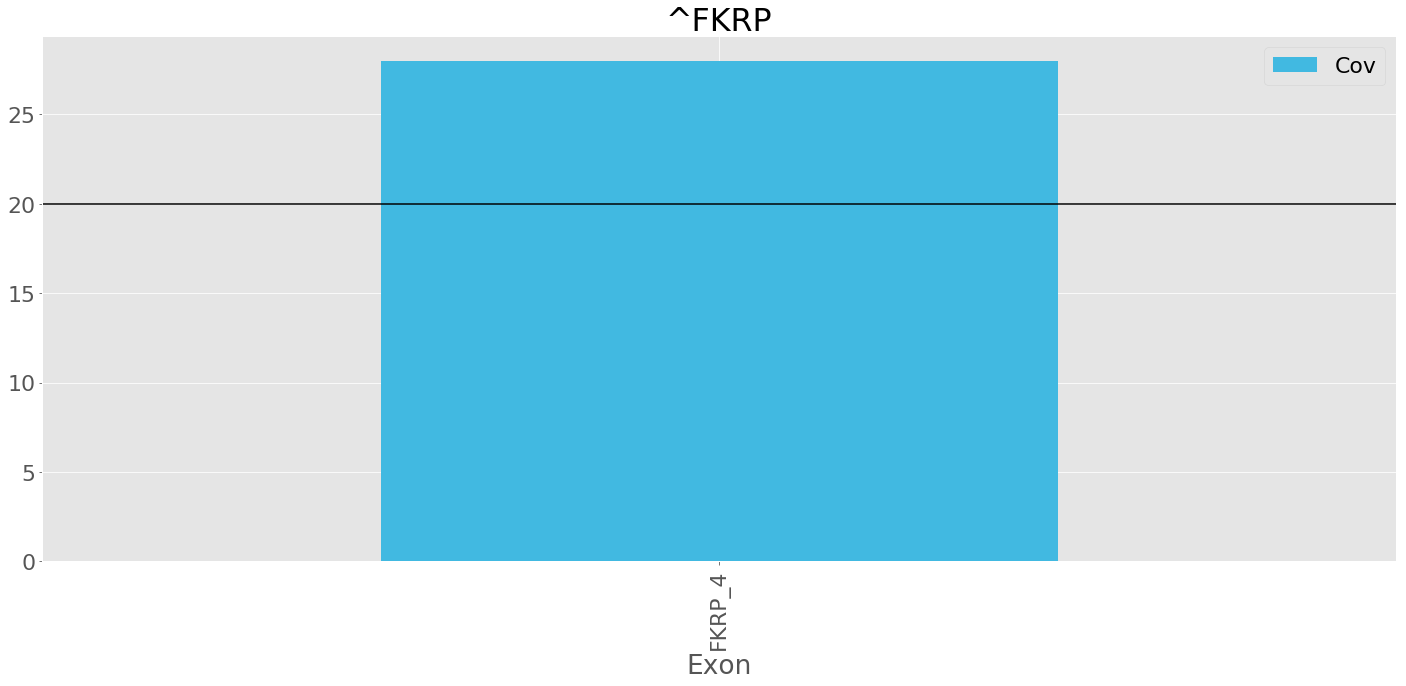

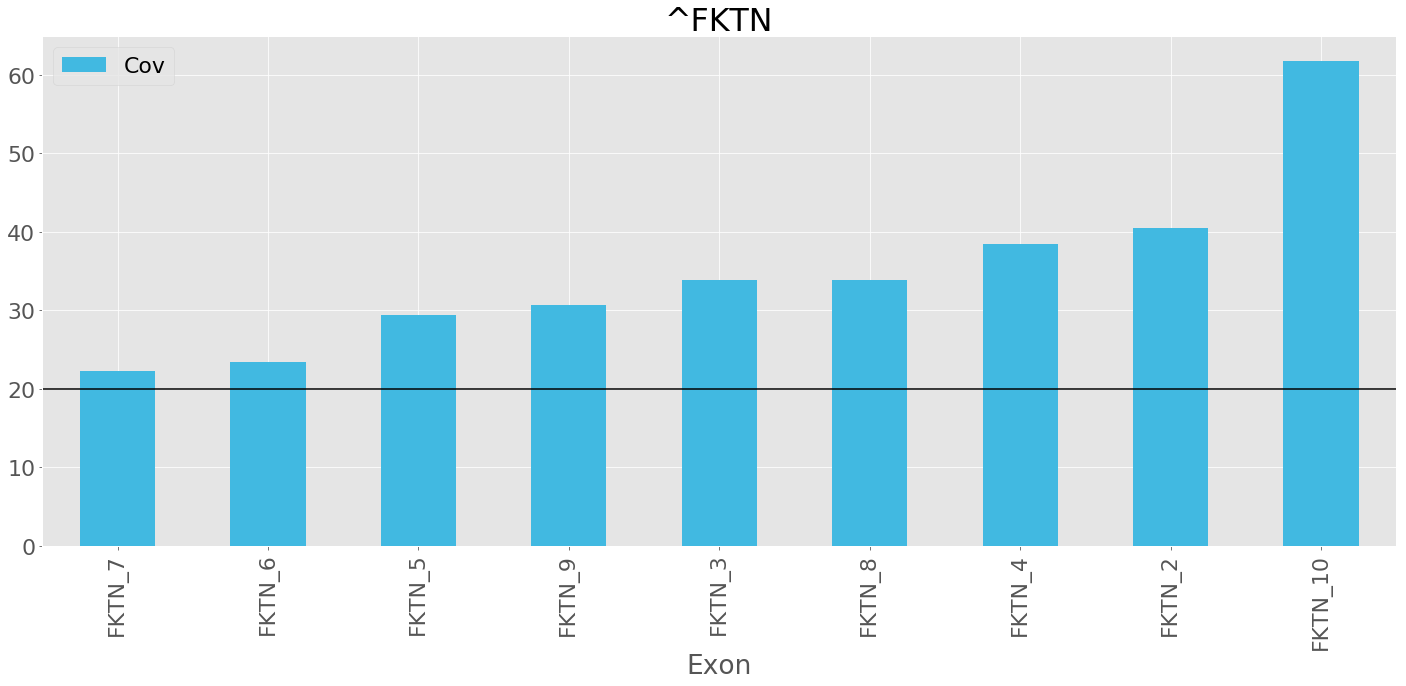

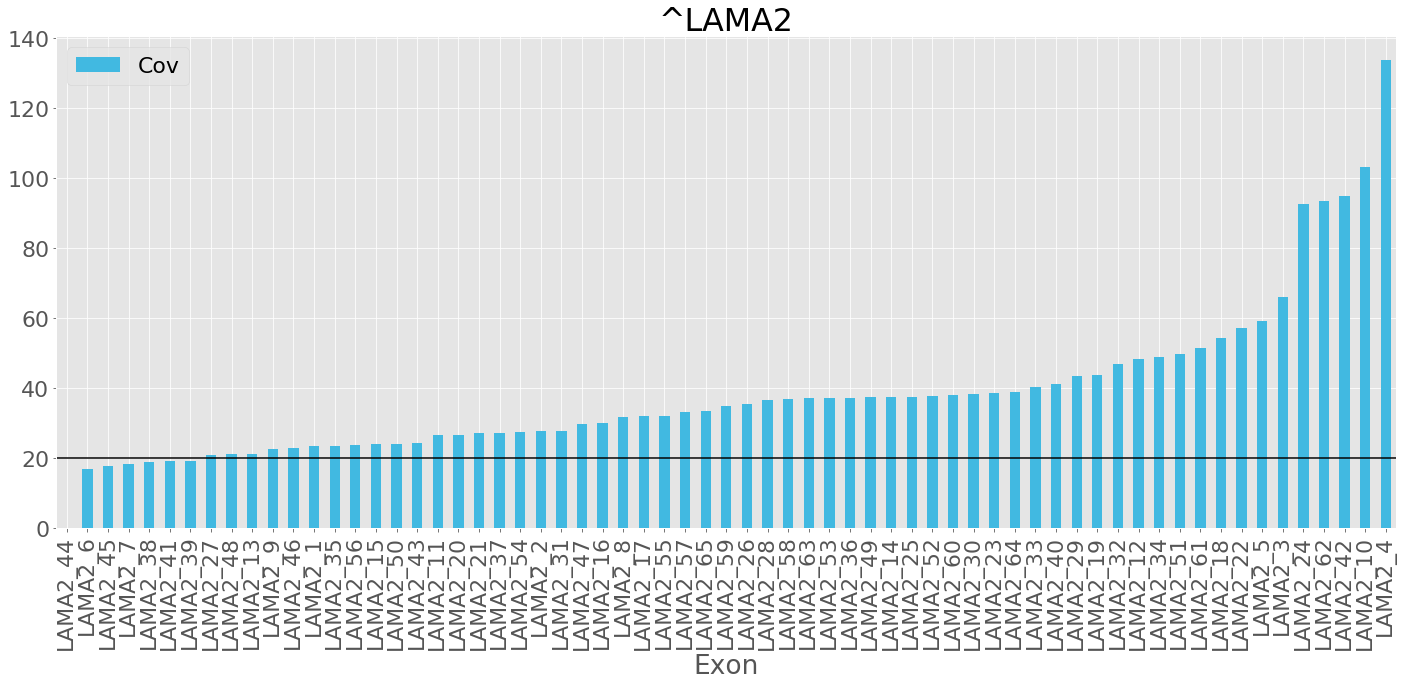

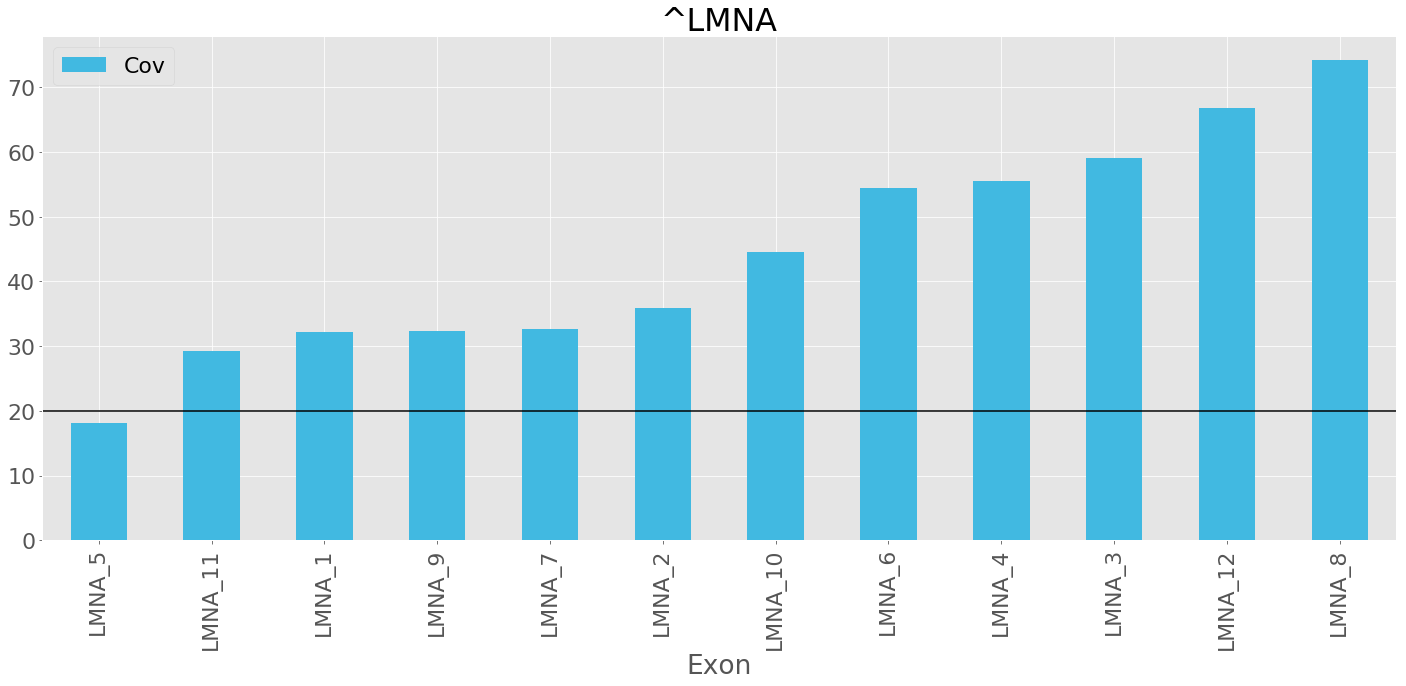

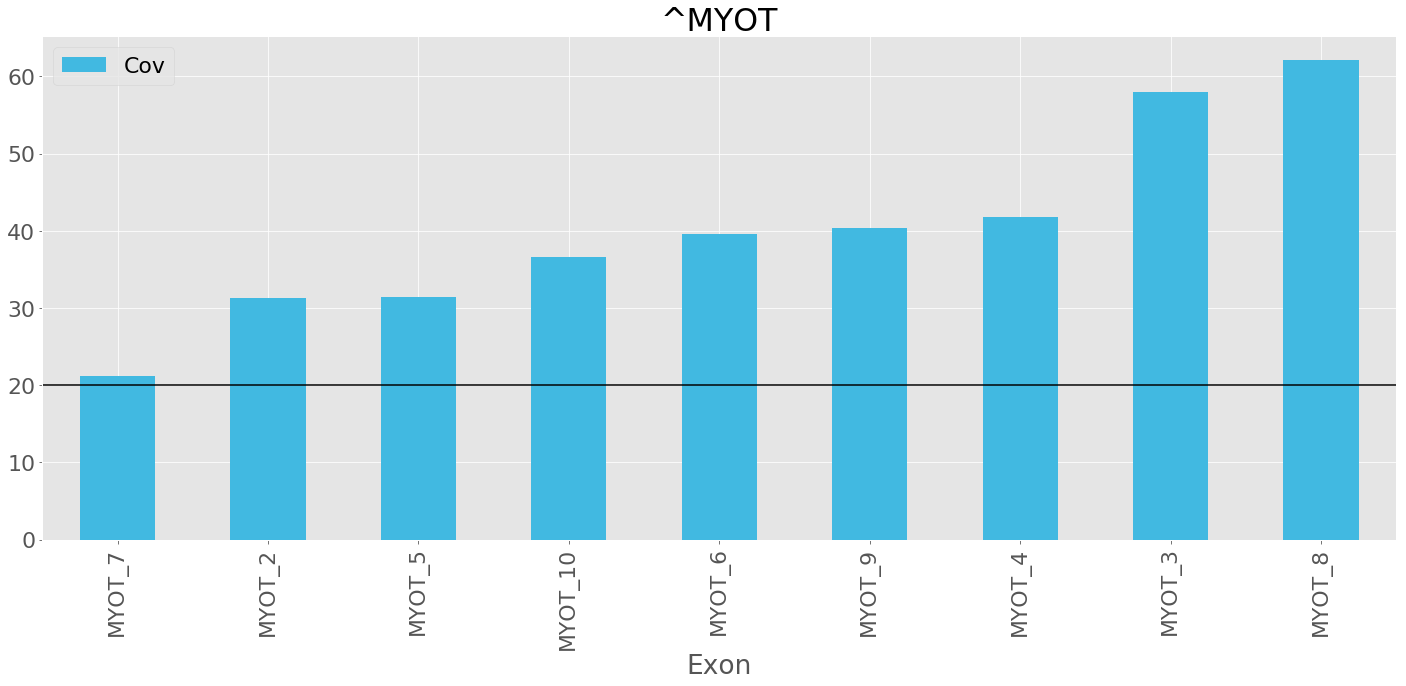

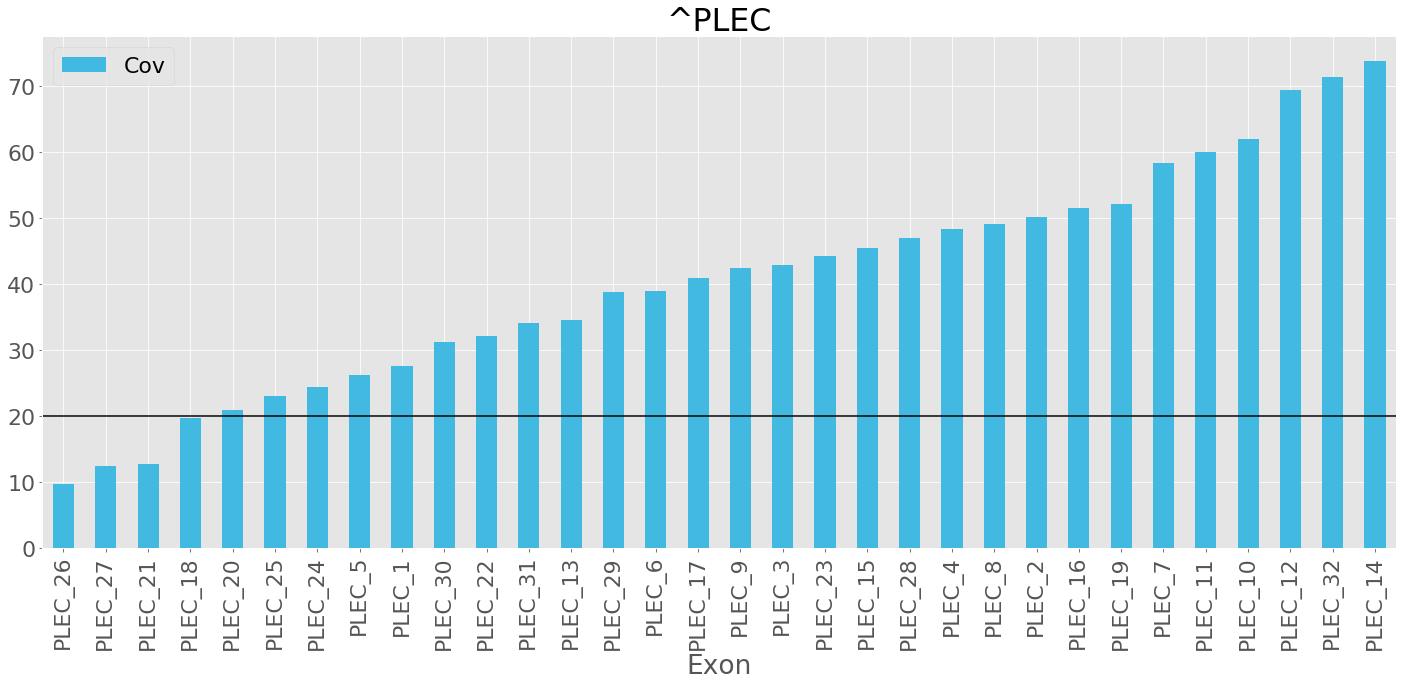

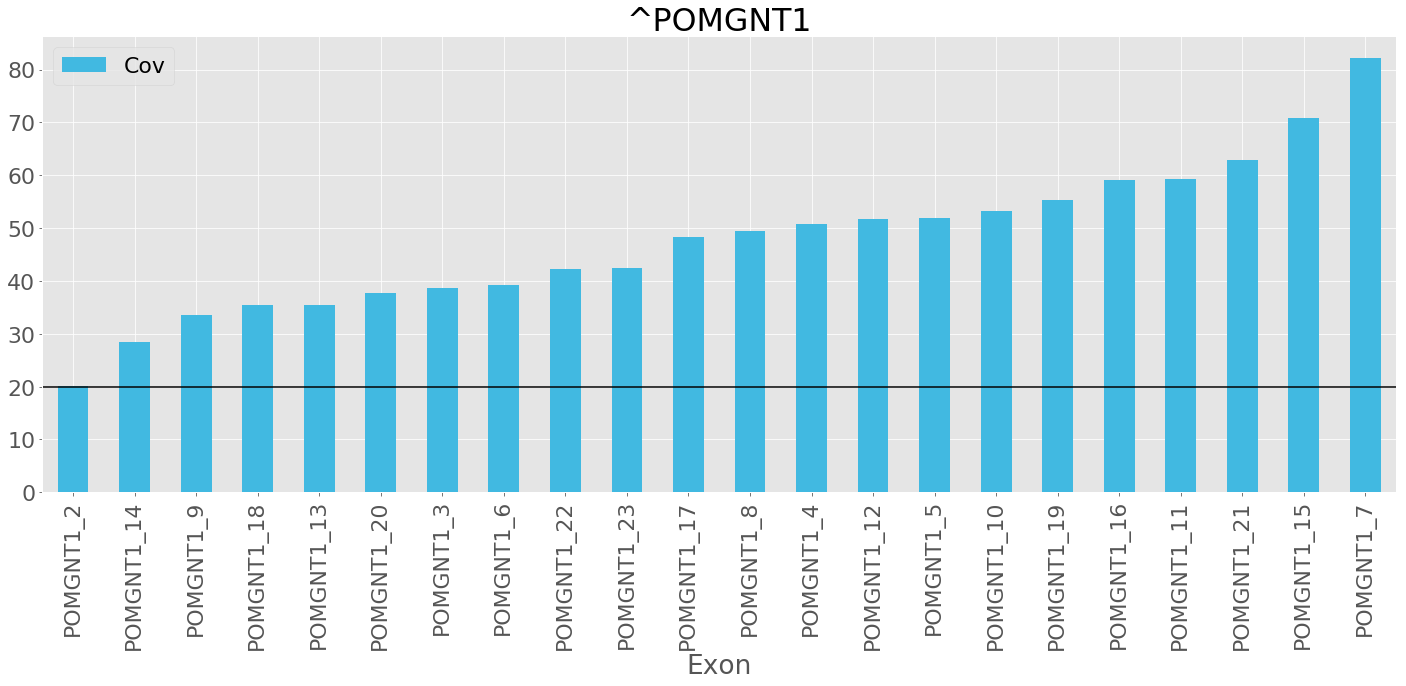

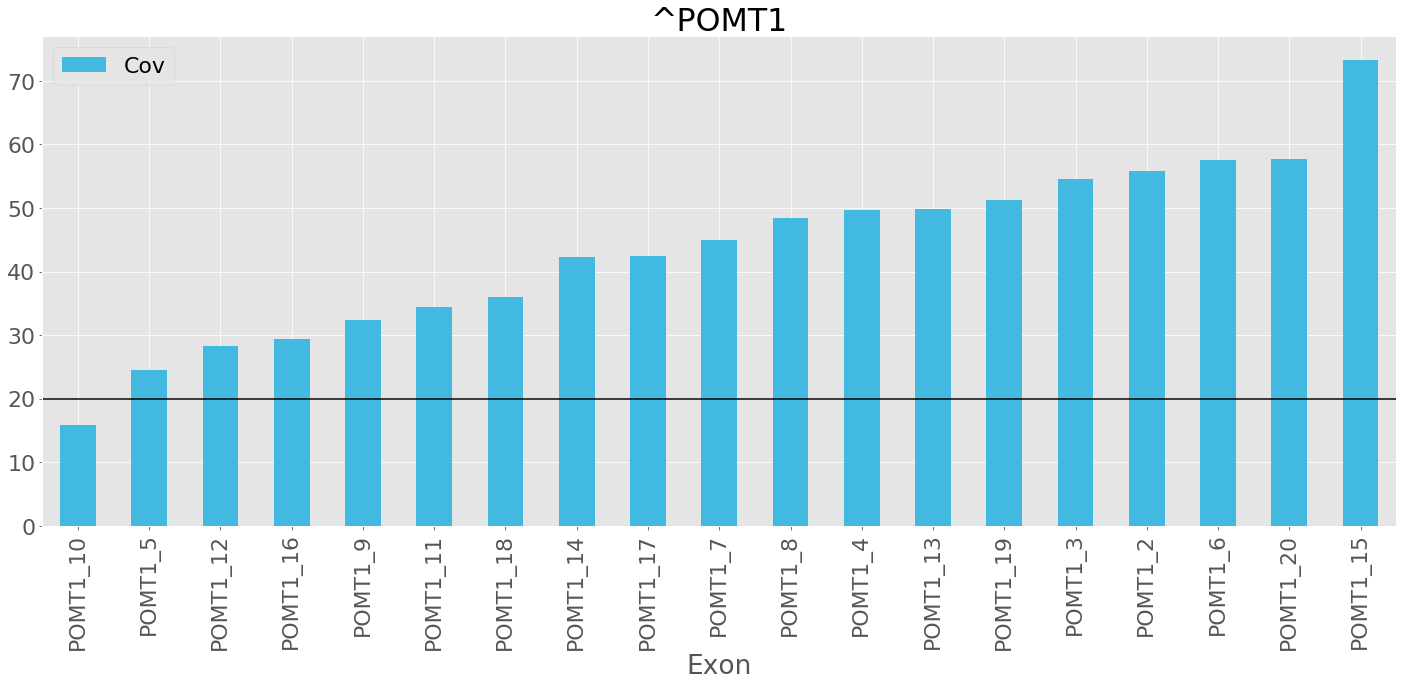

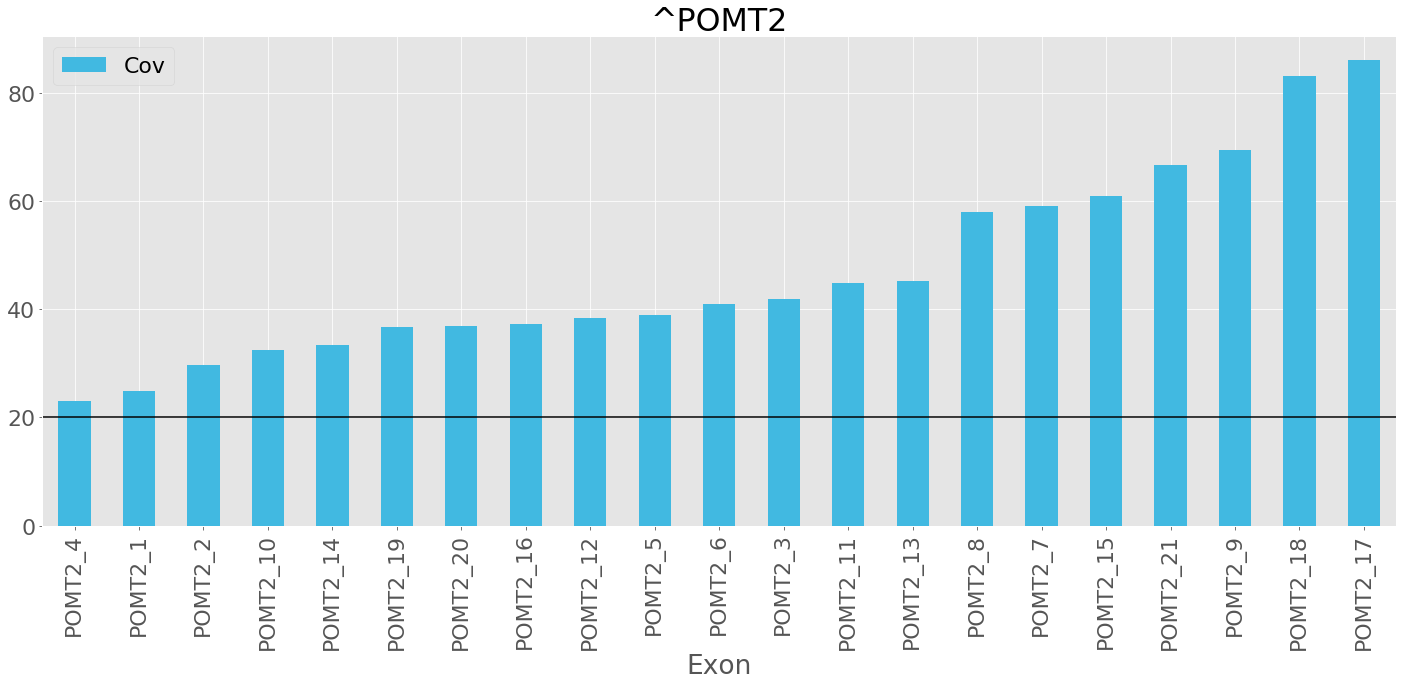

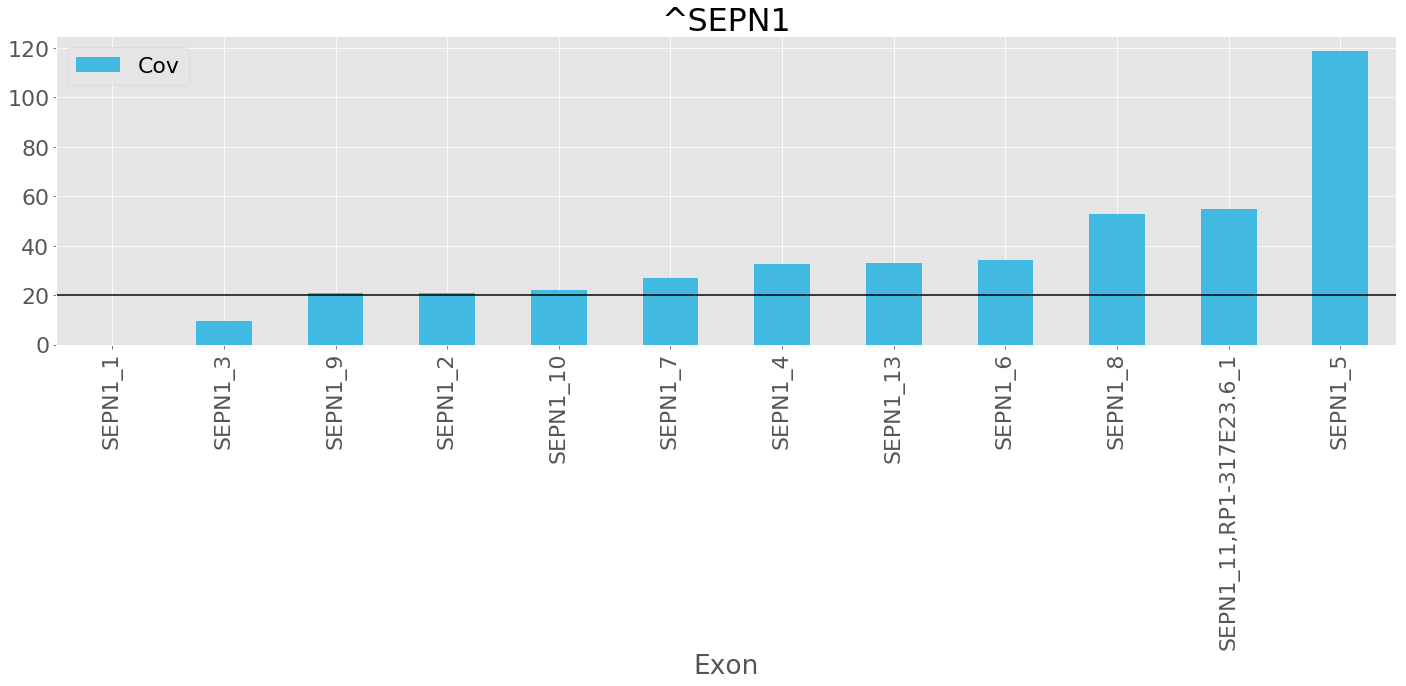

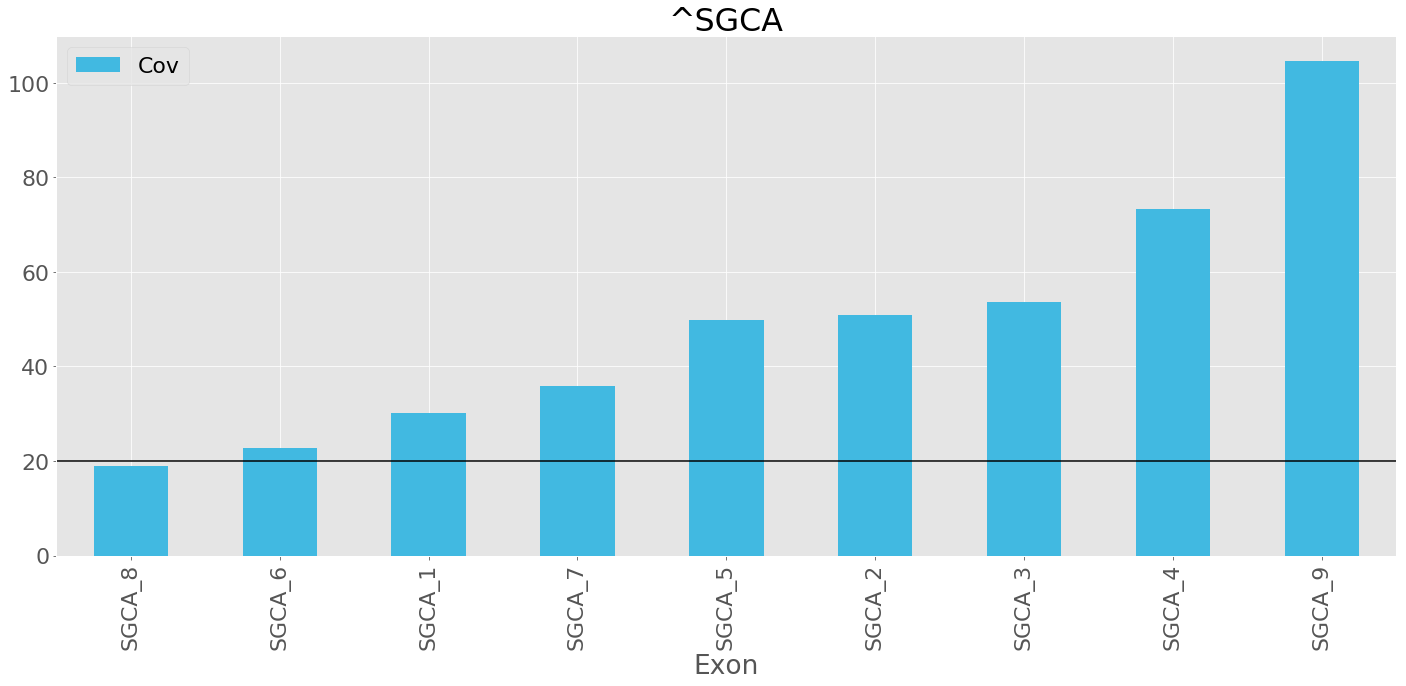

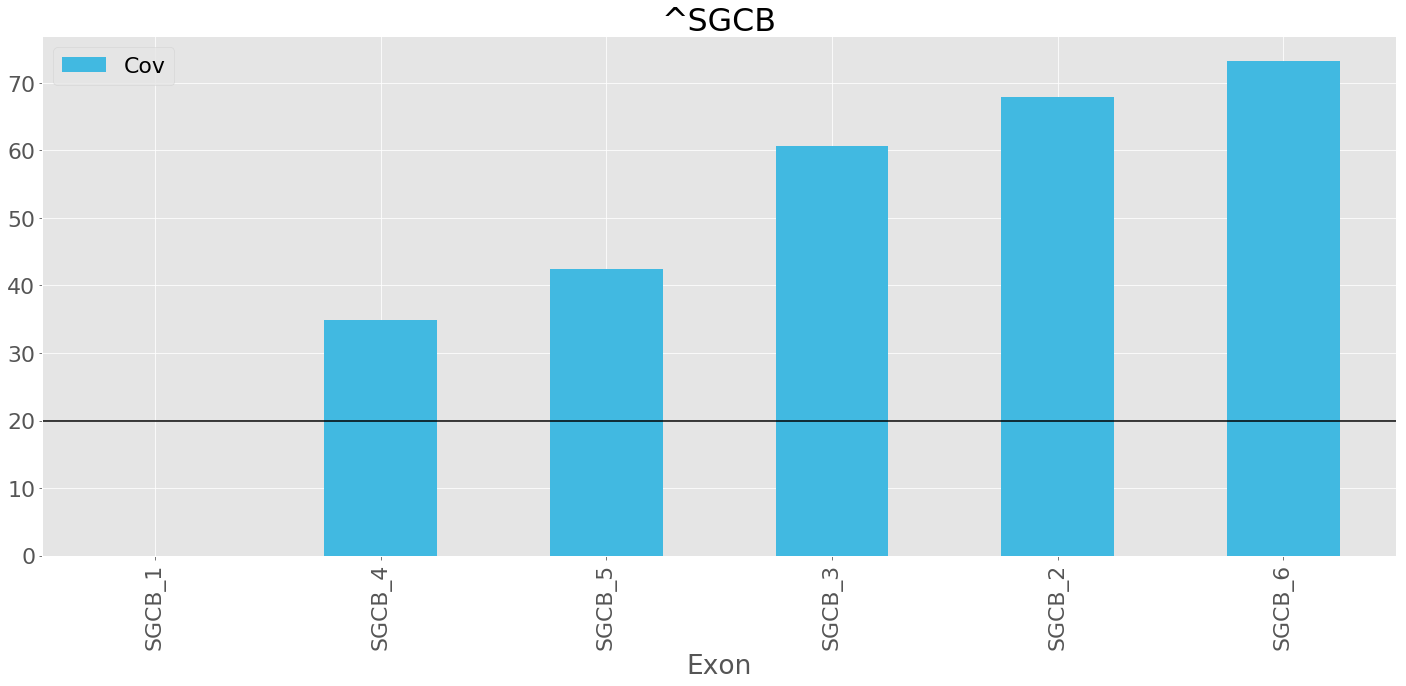

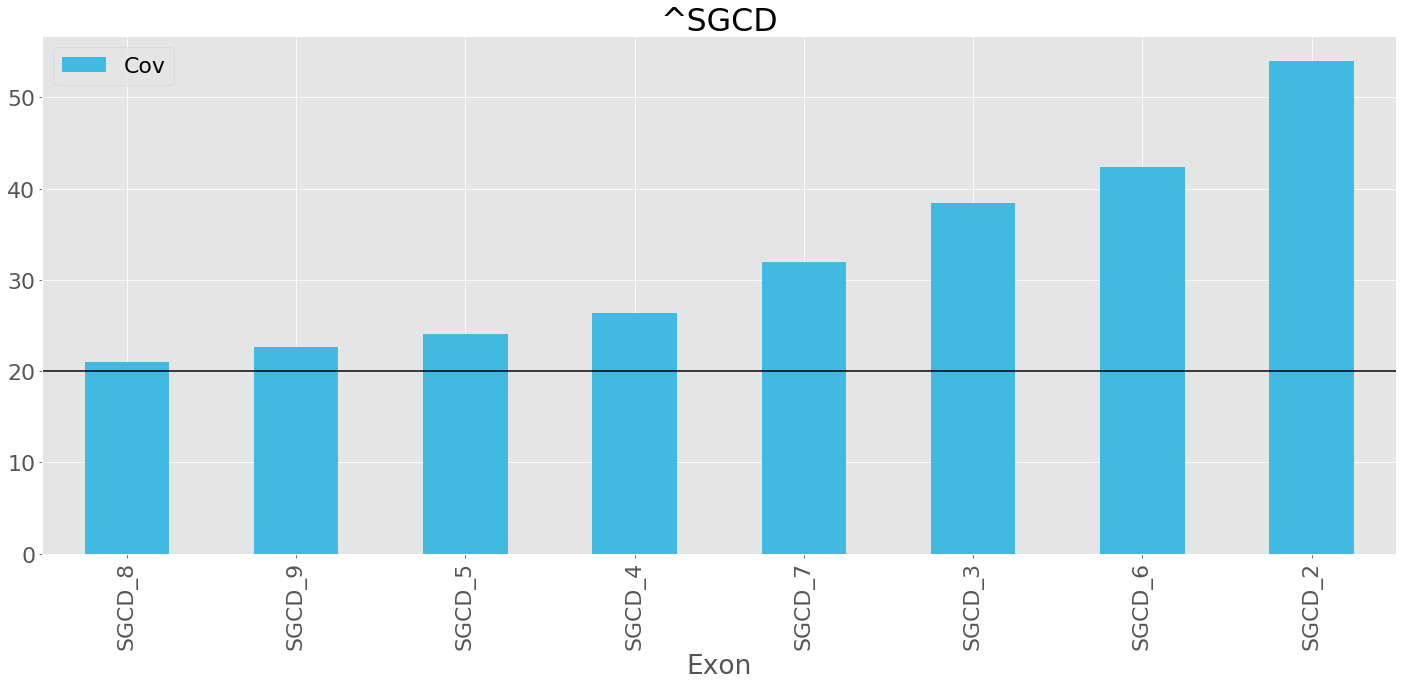

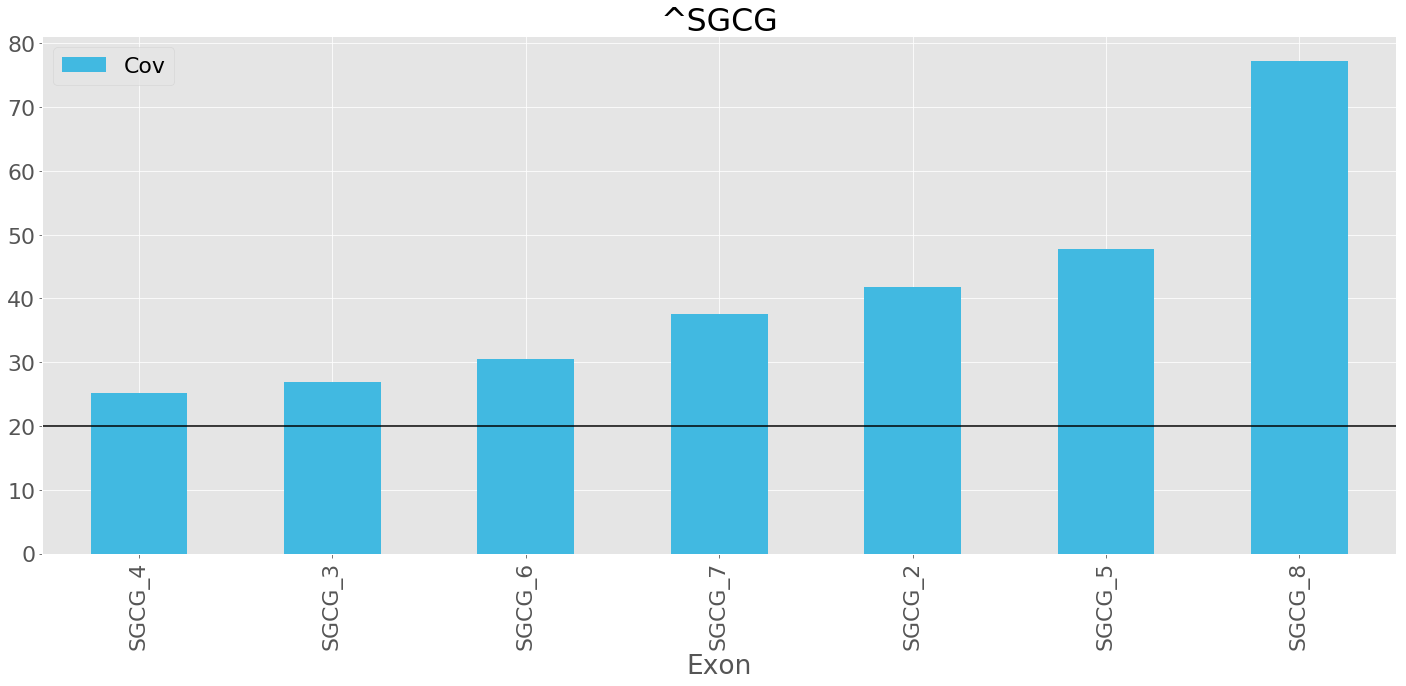

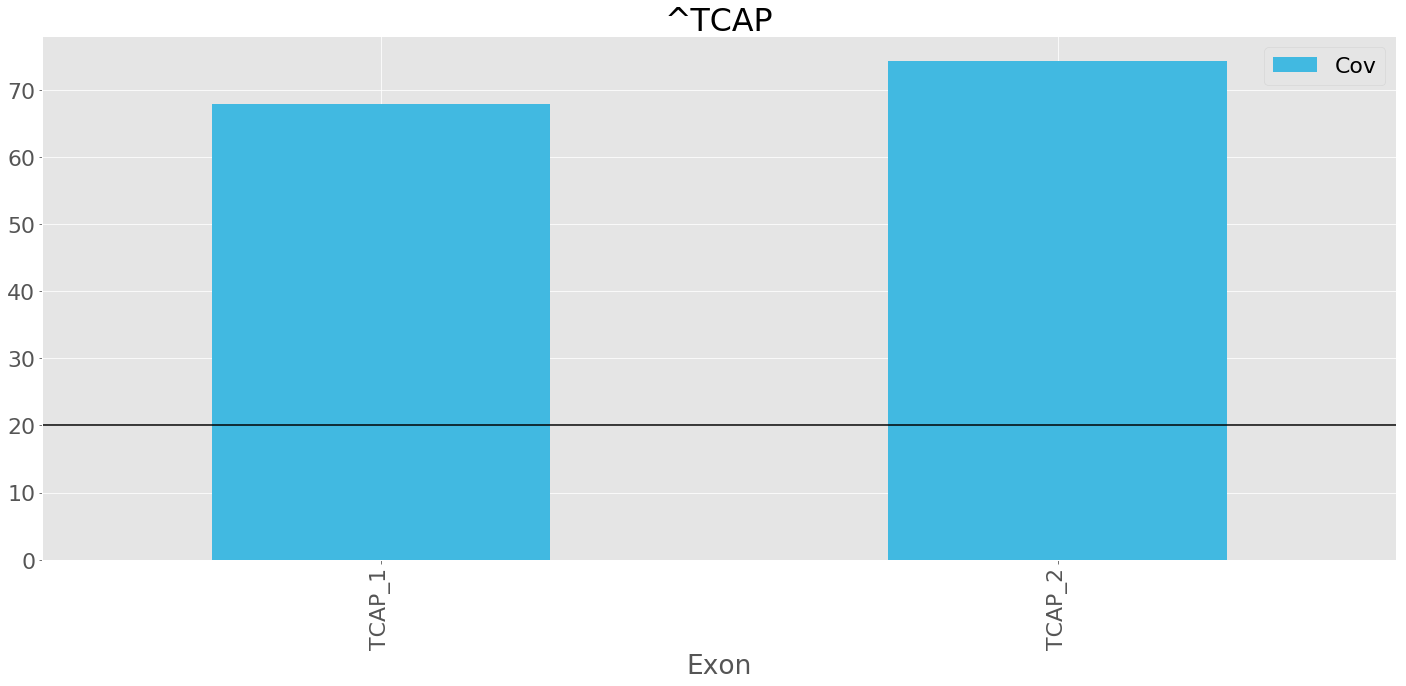

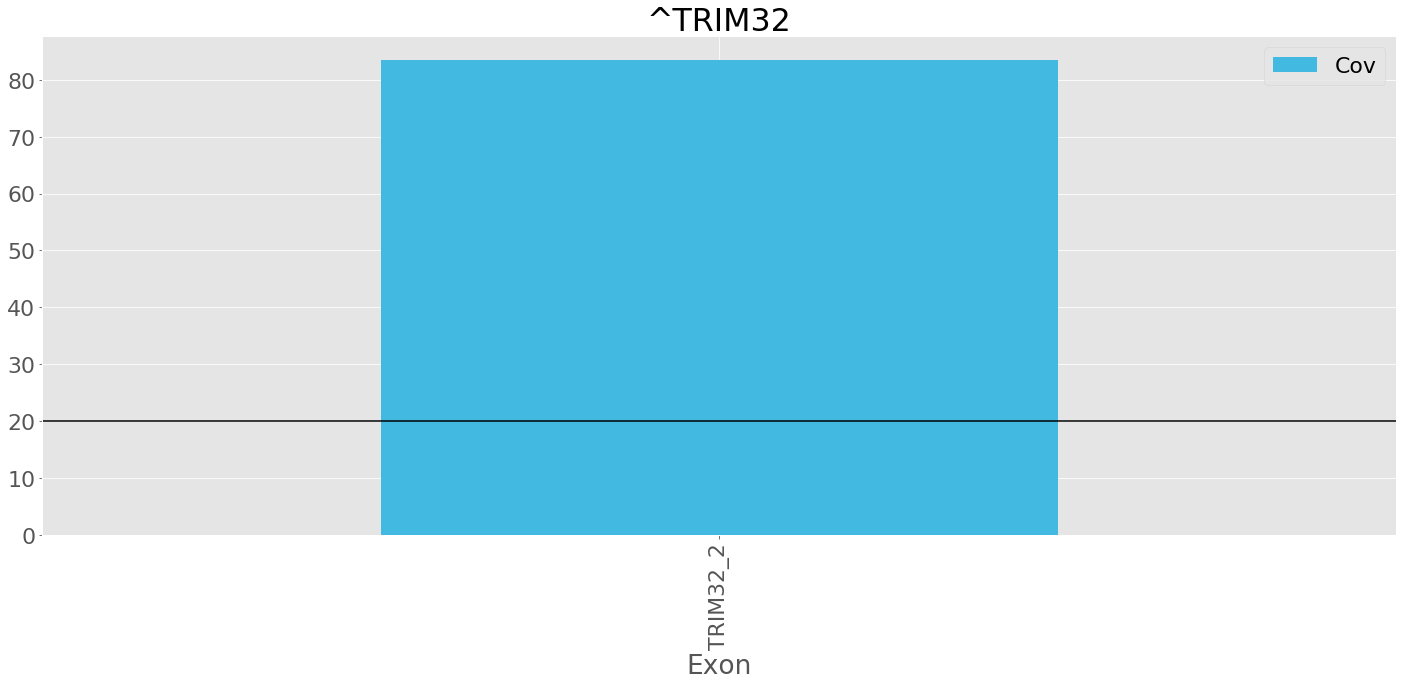

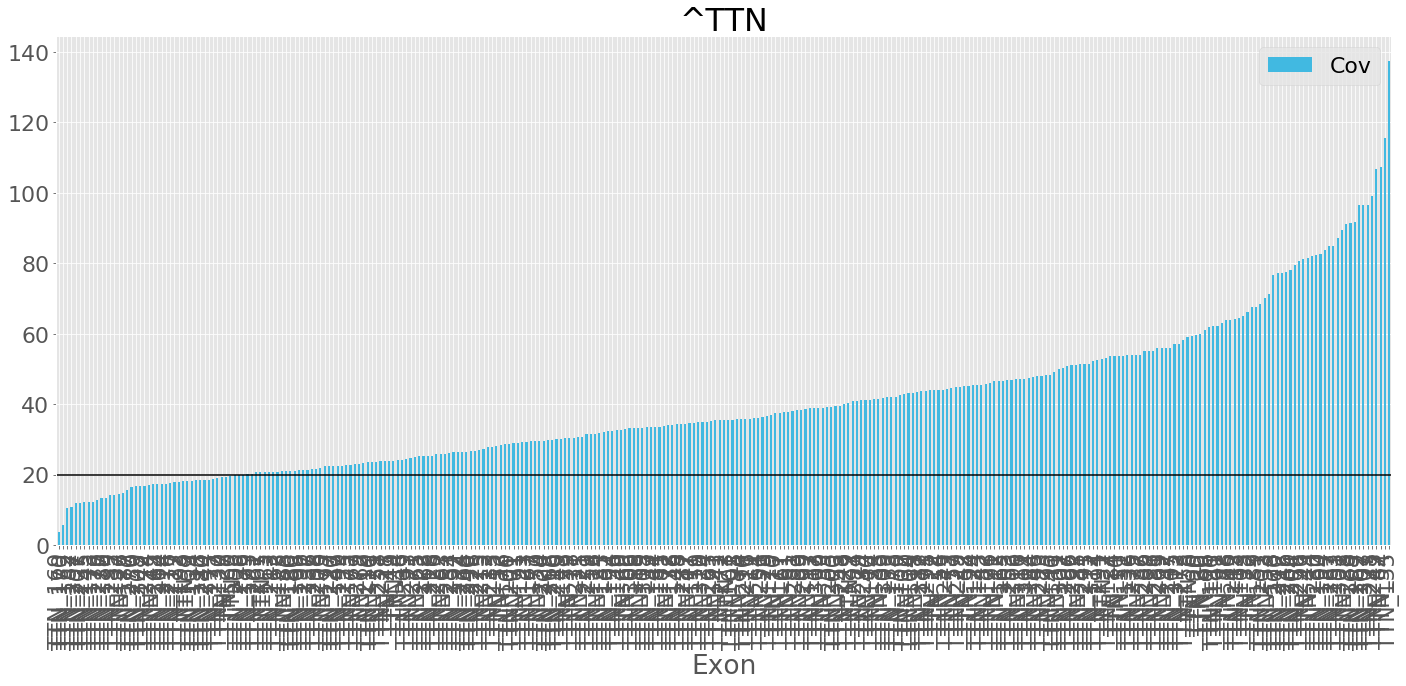

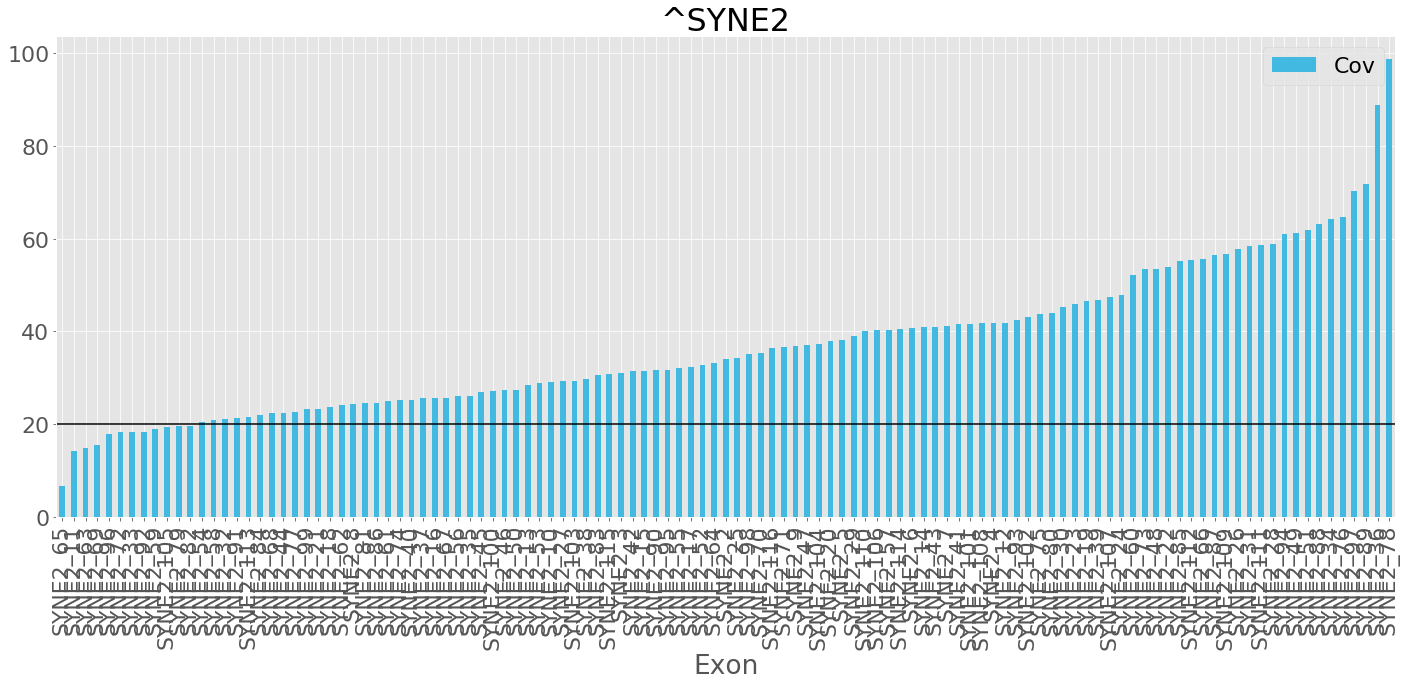

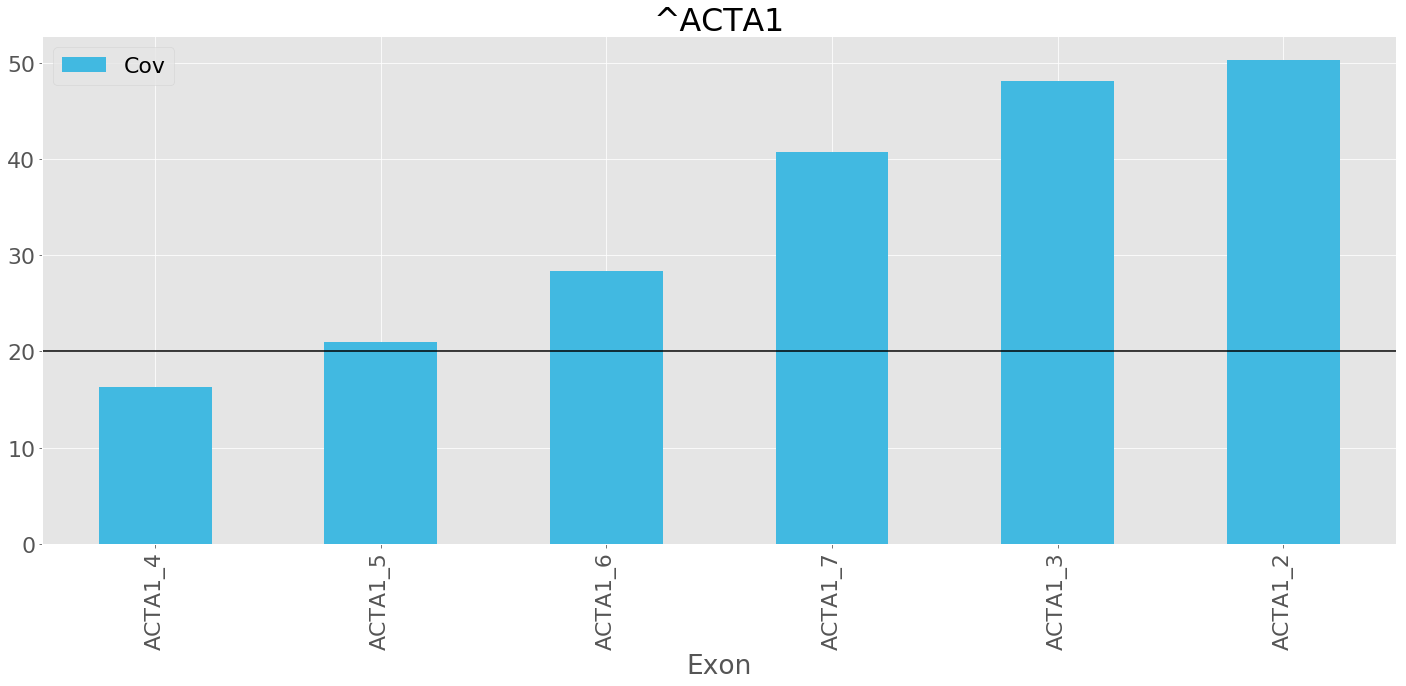

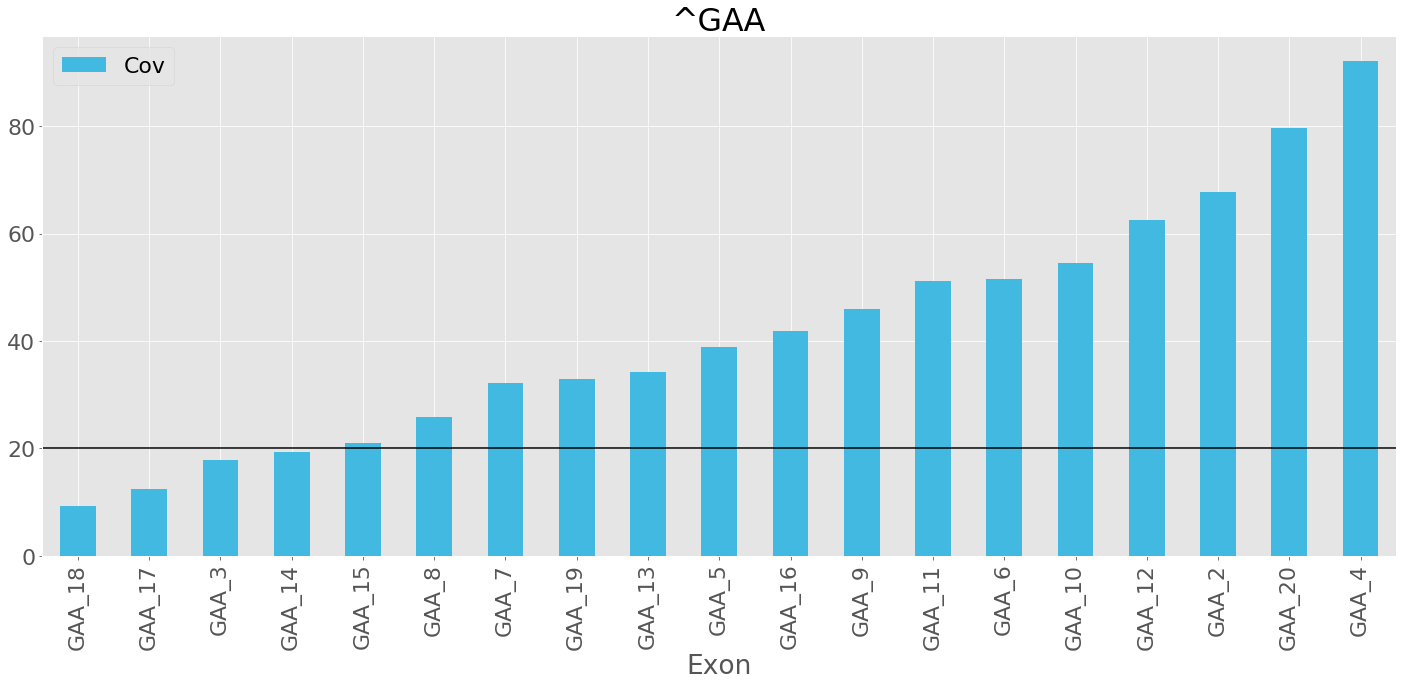

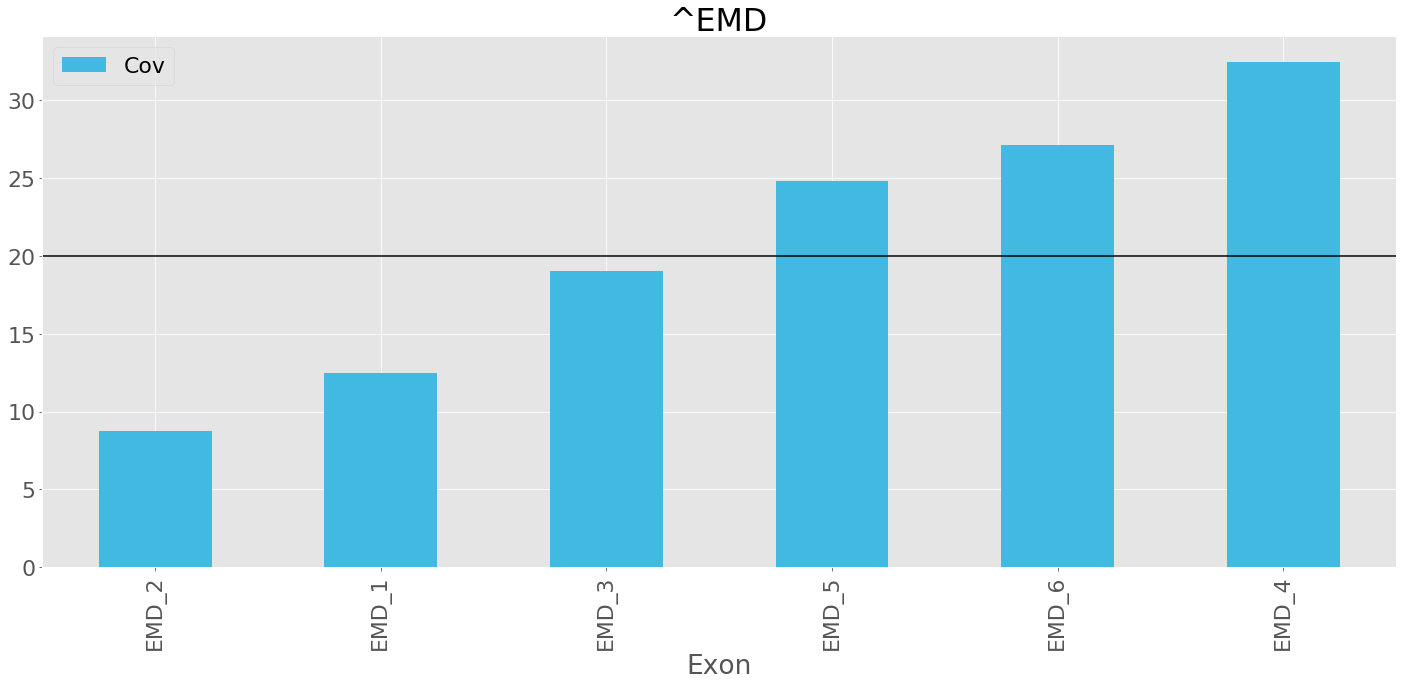

In [38]:
for genes in genes:
    grafico_media(genes)

/home/genetix/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/genetix/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/genetix/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicit

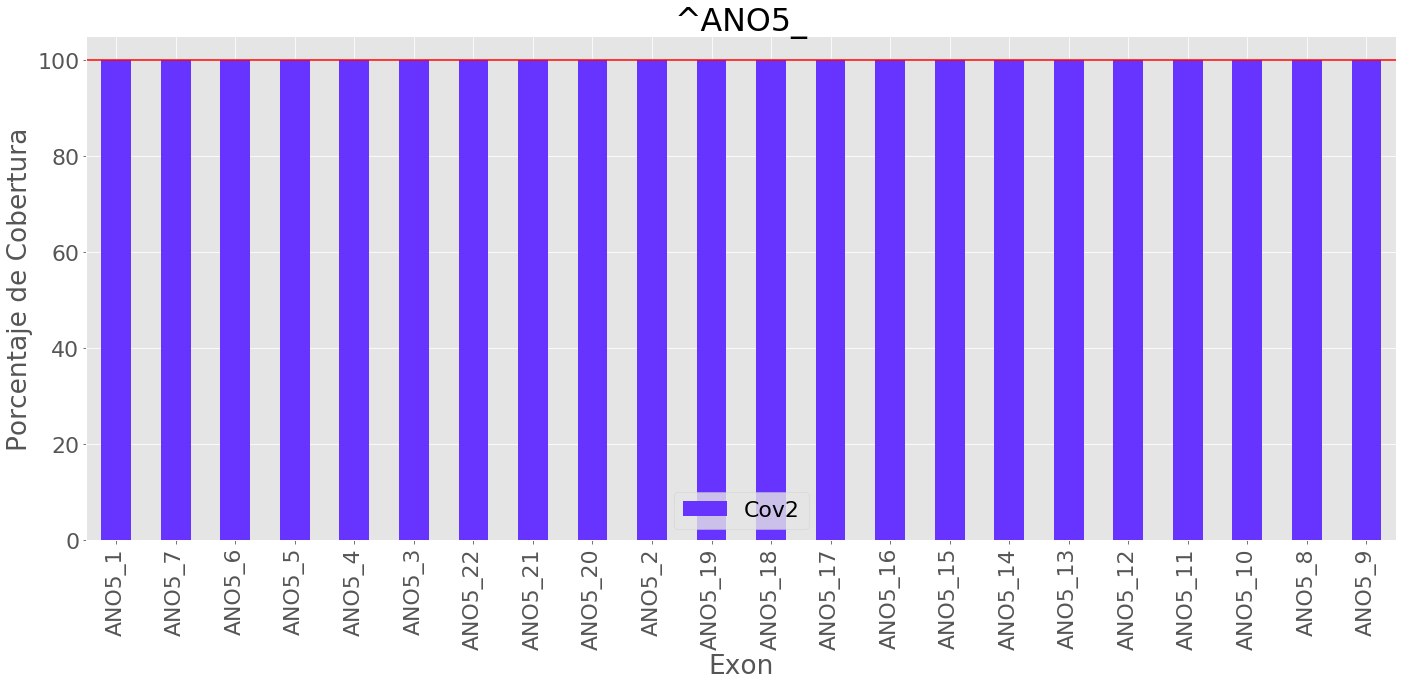

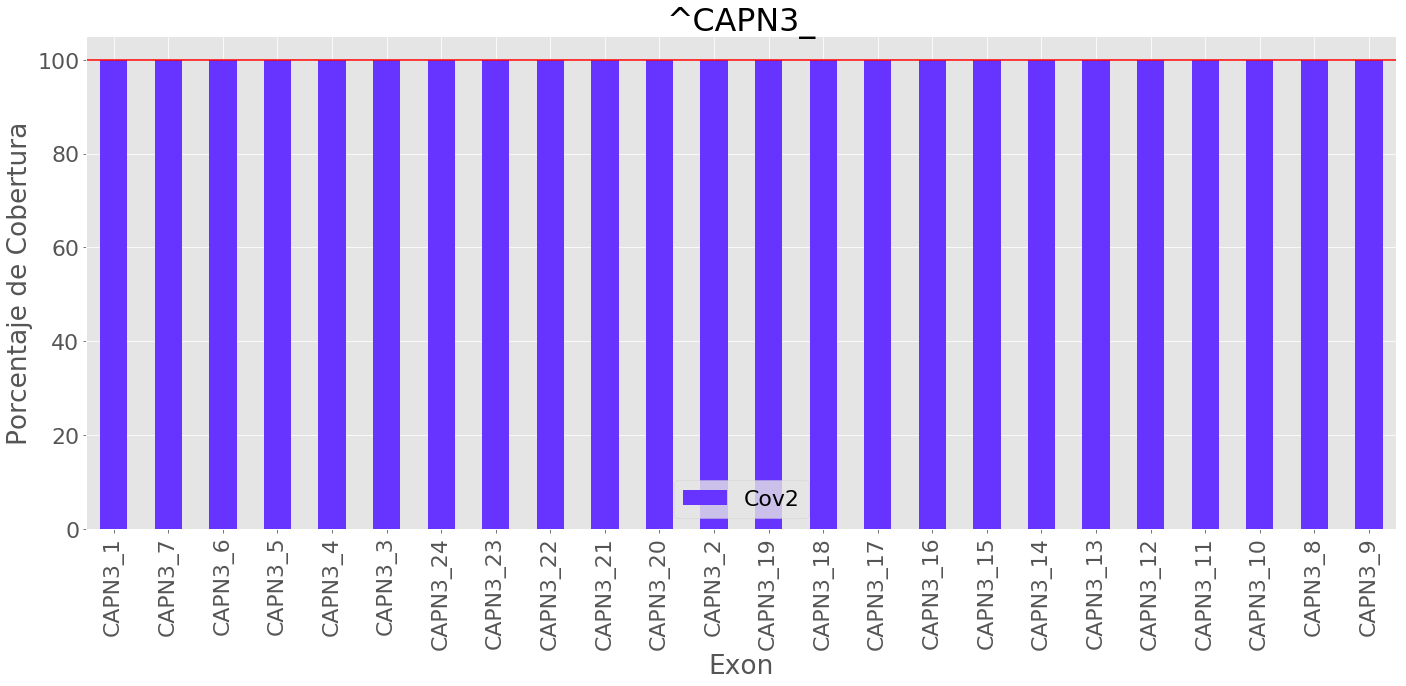

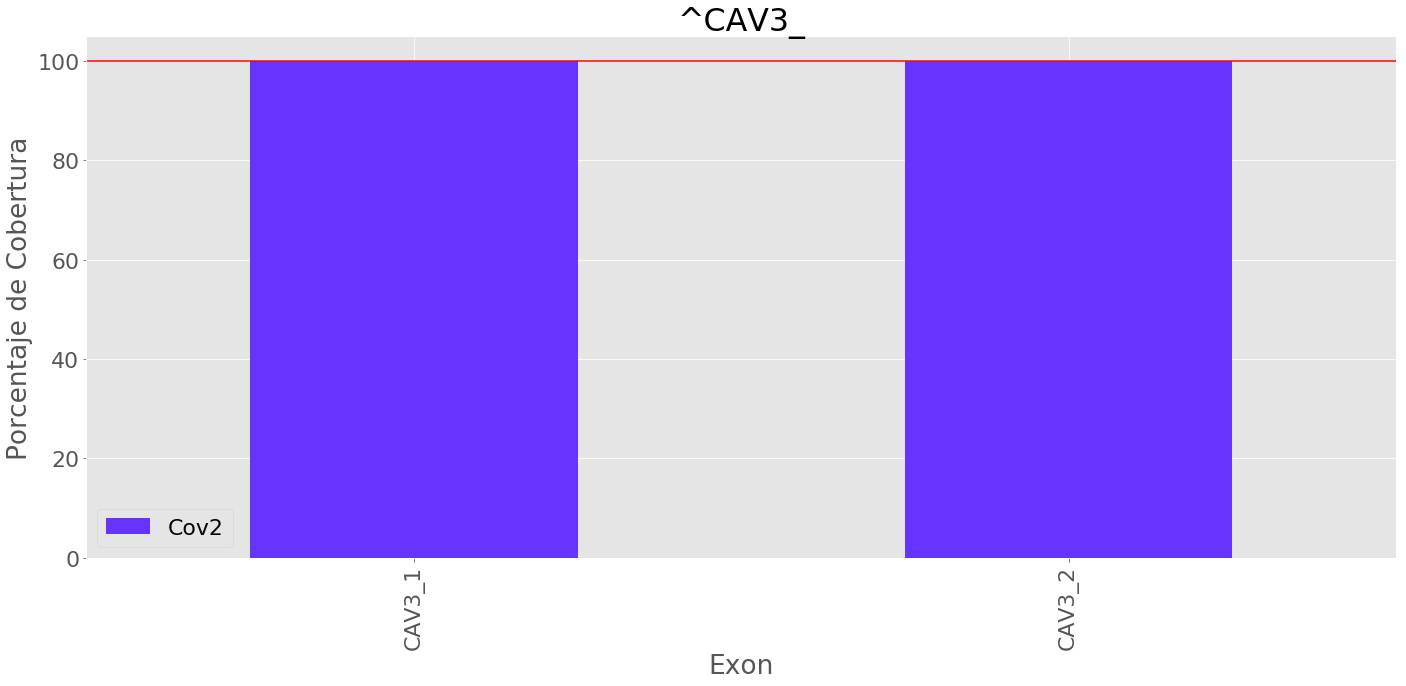

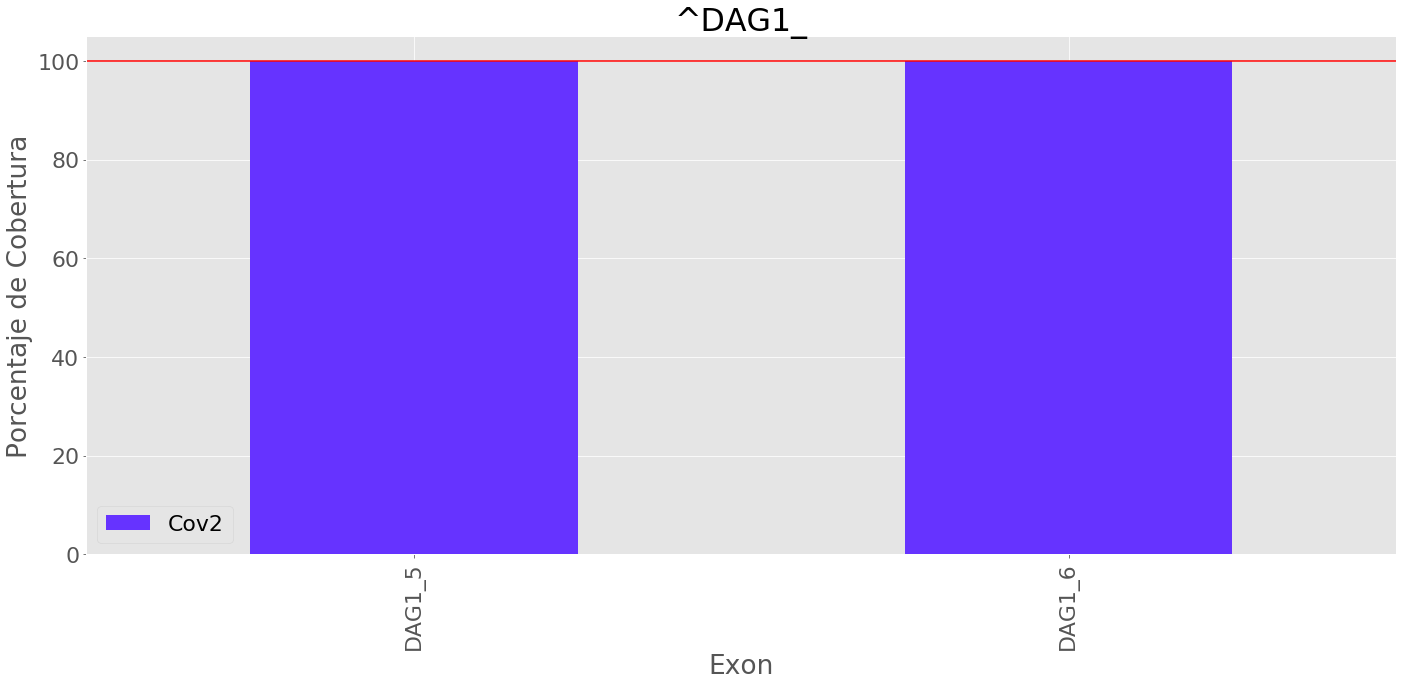

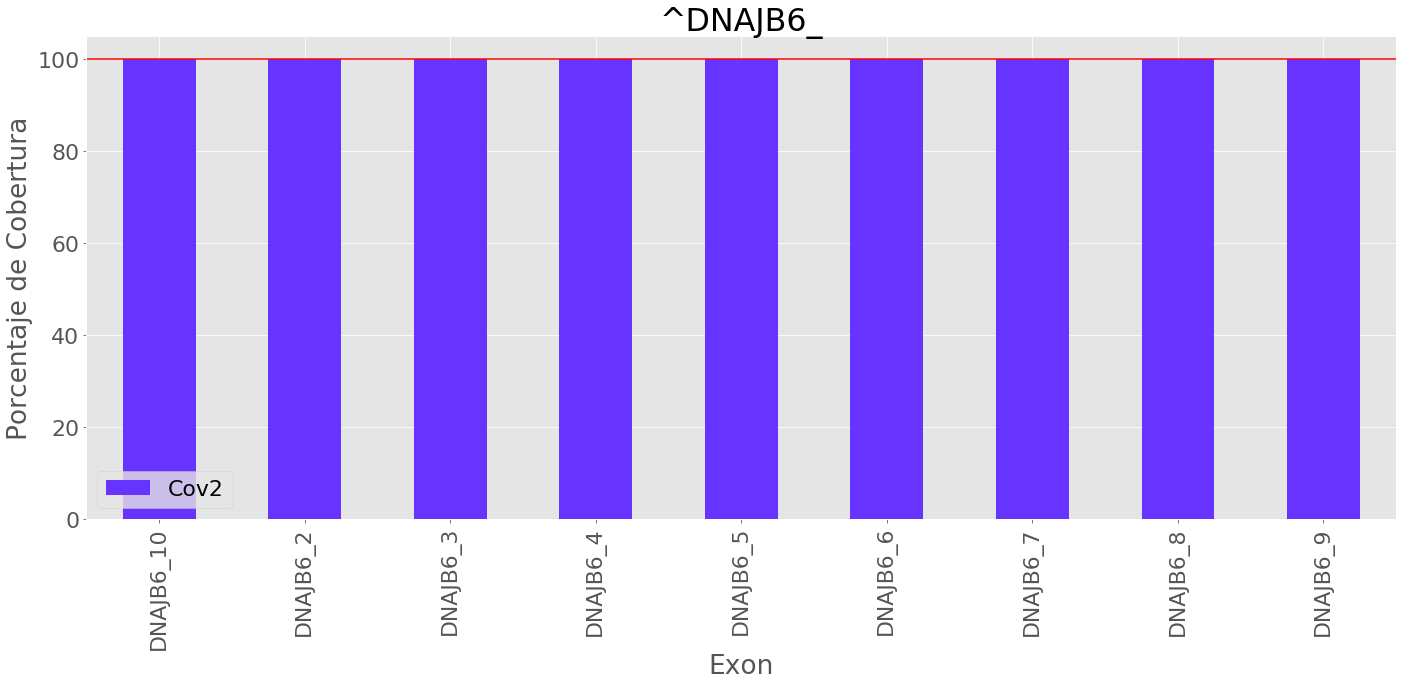

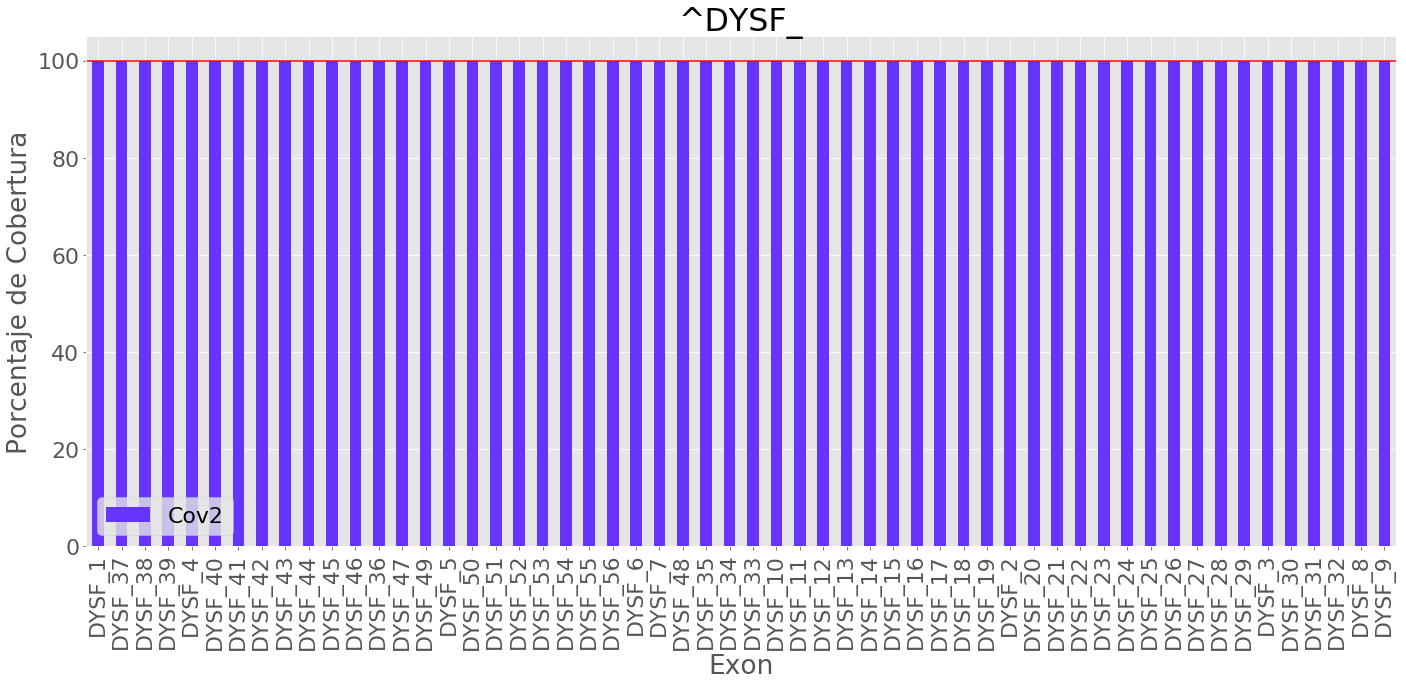

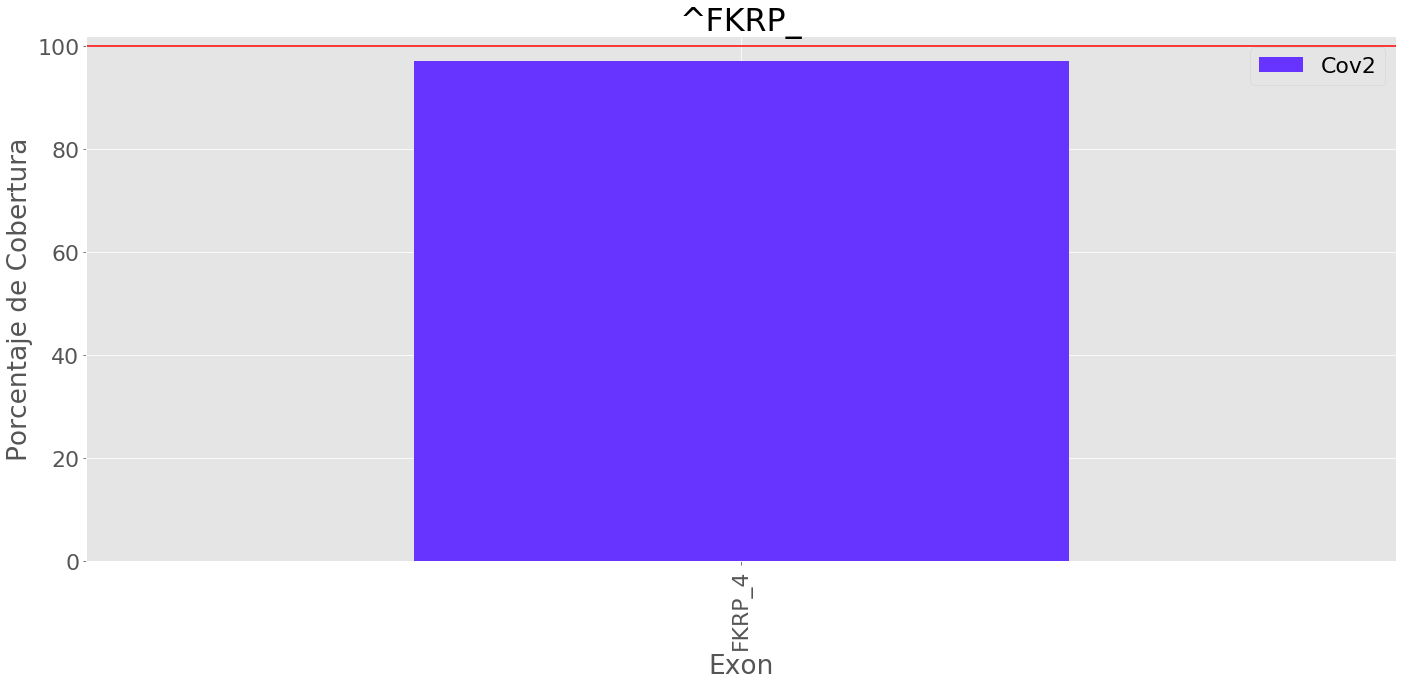

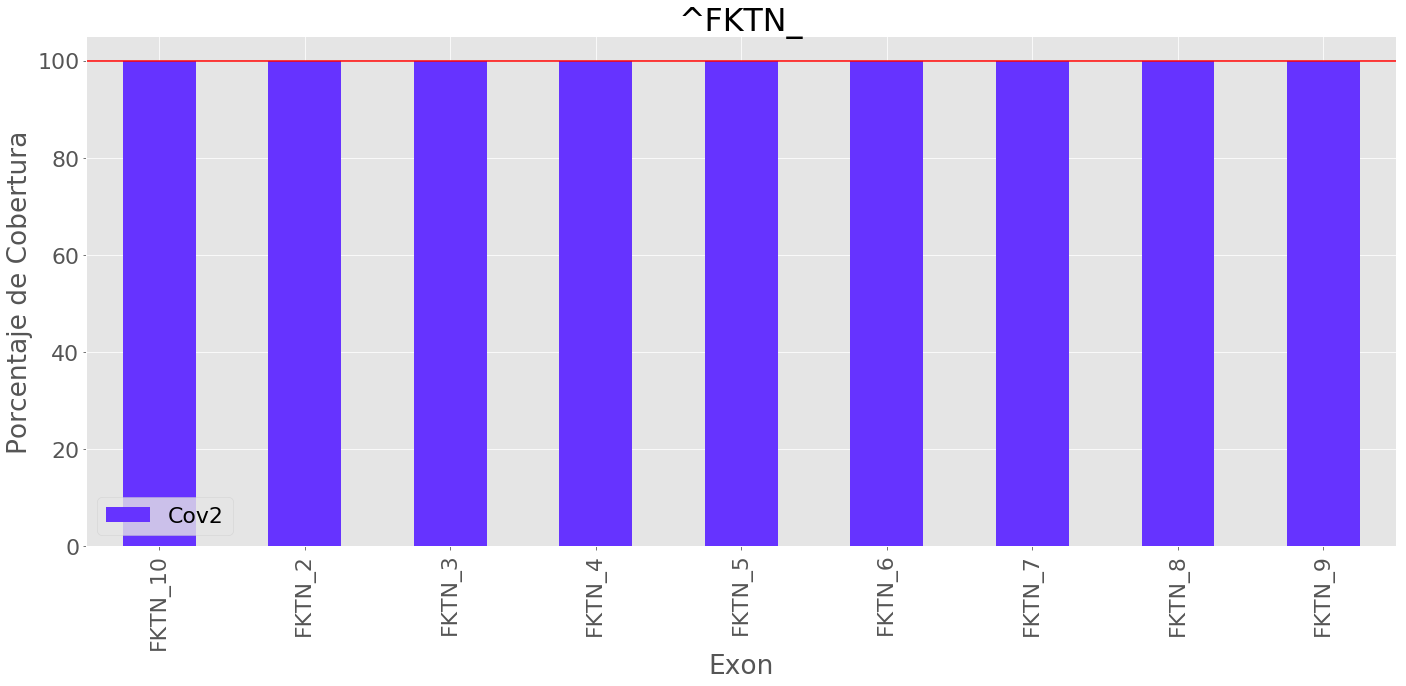

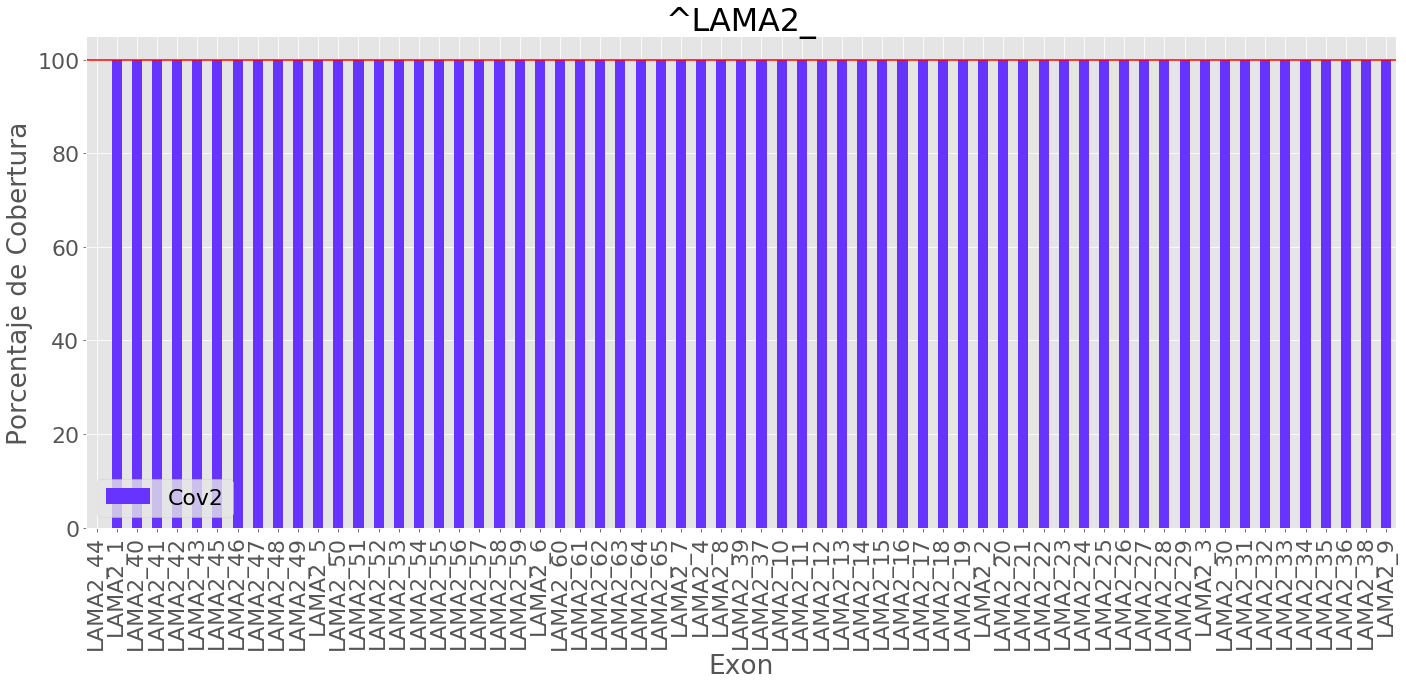

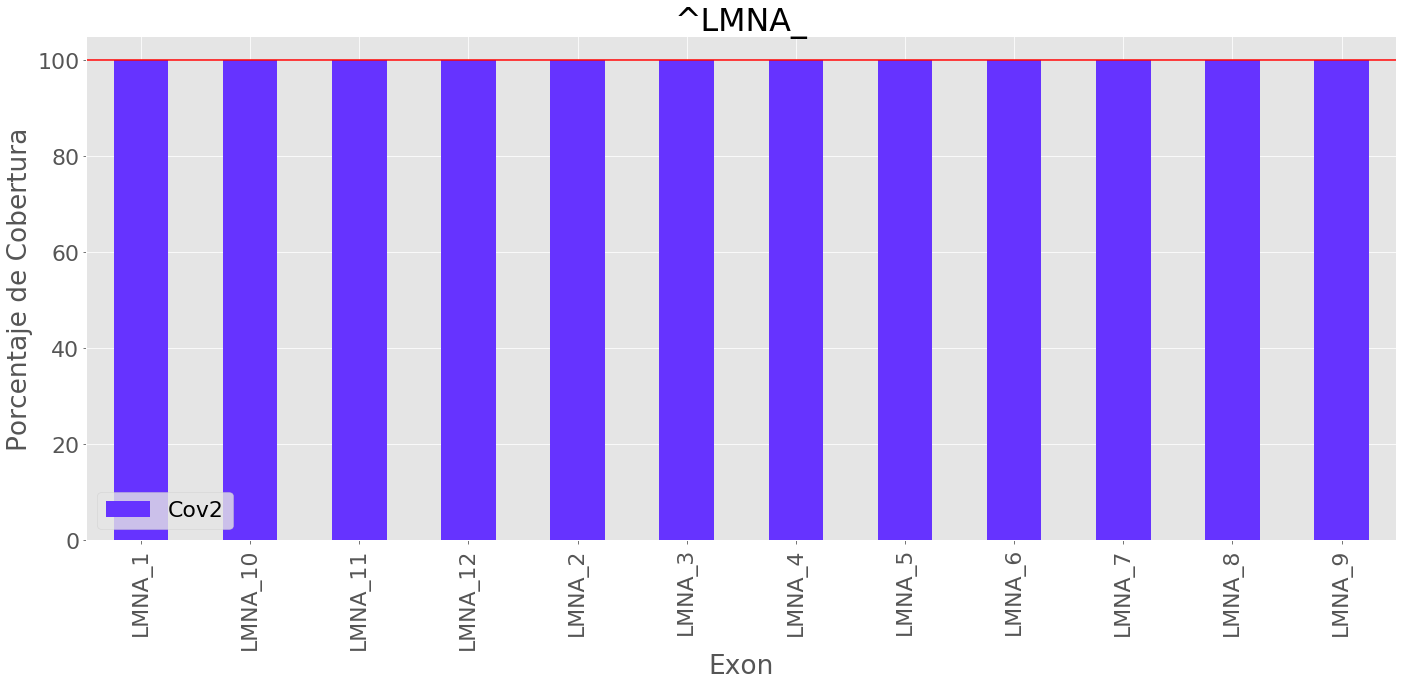

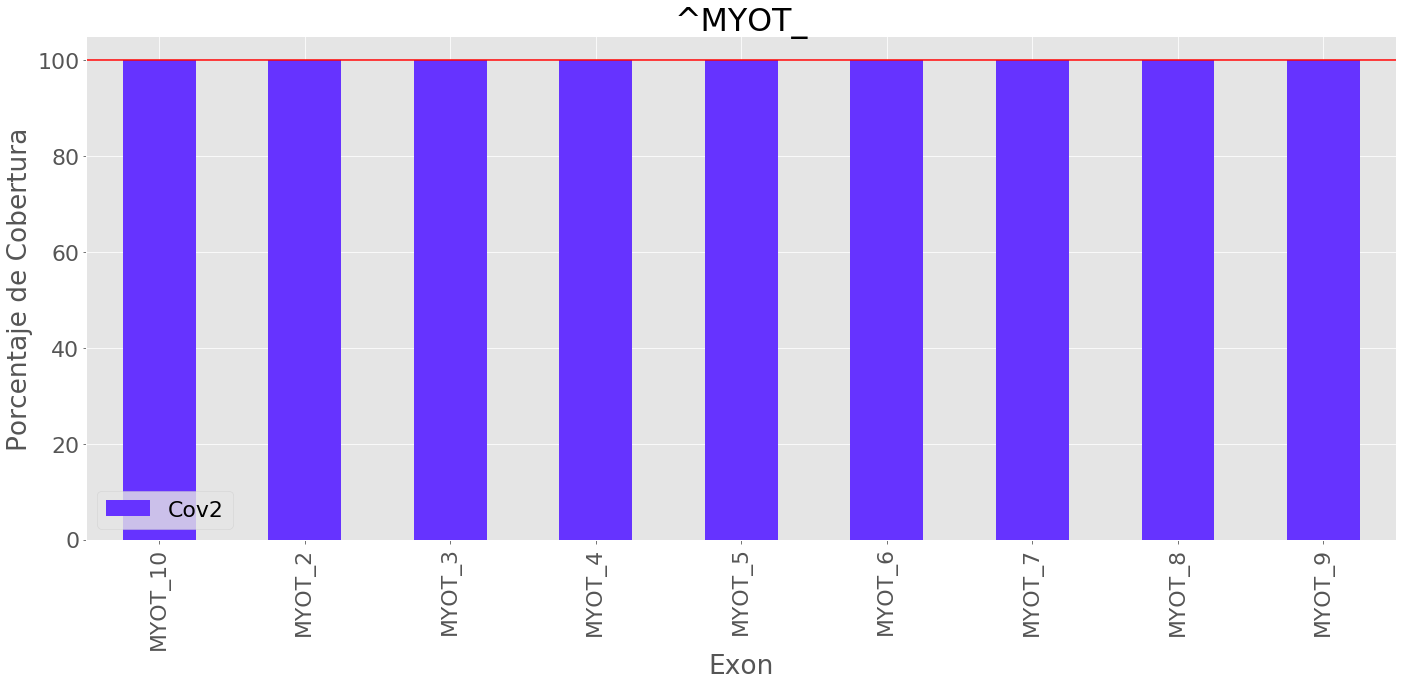

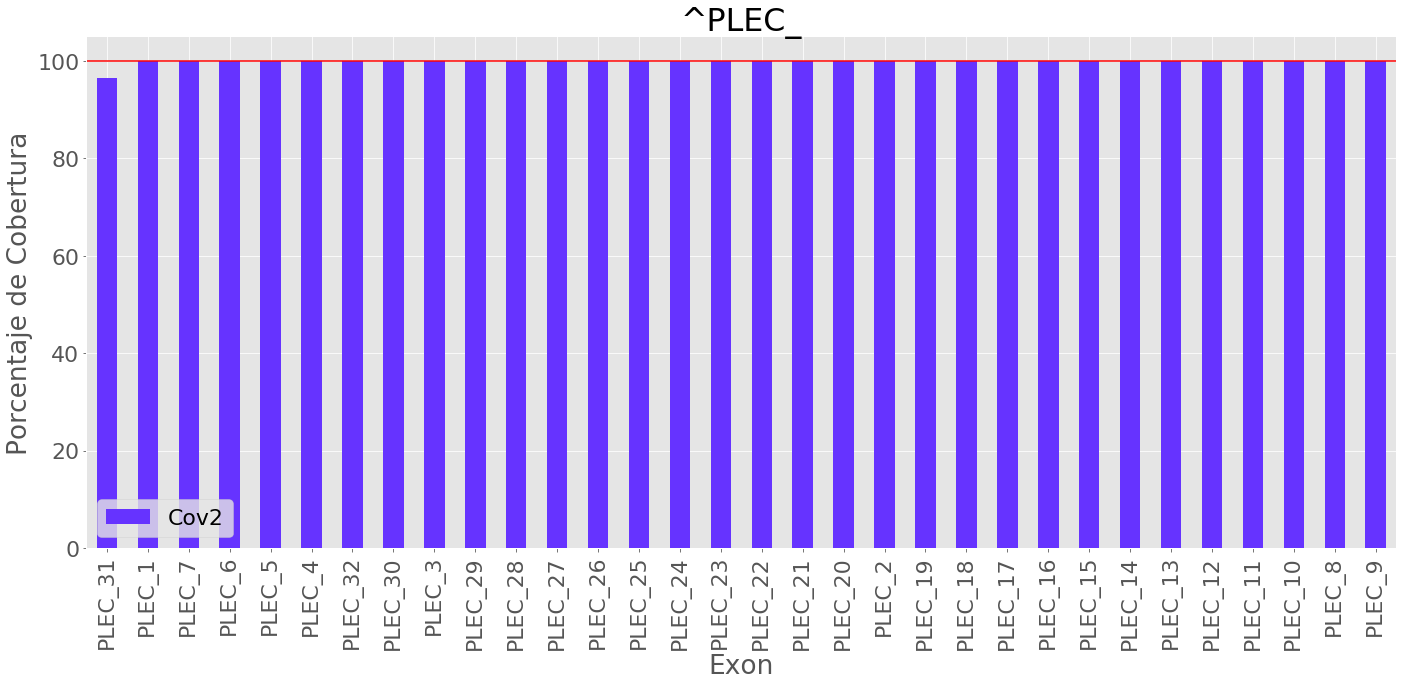

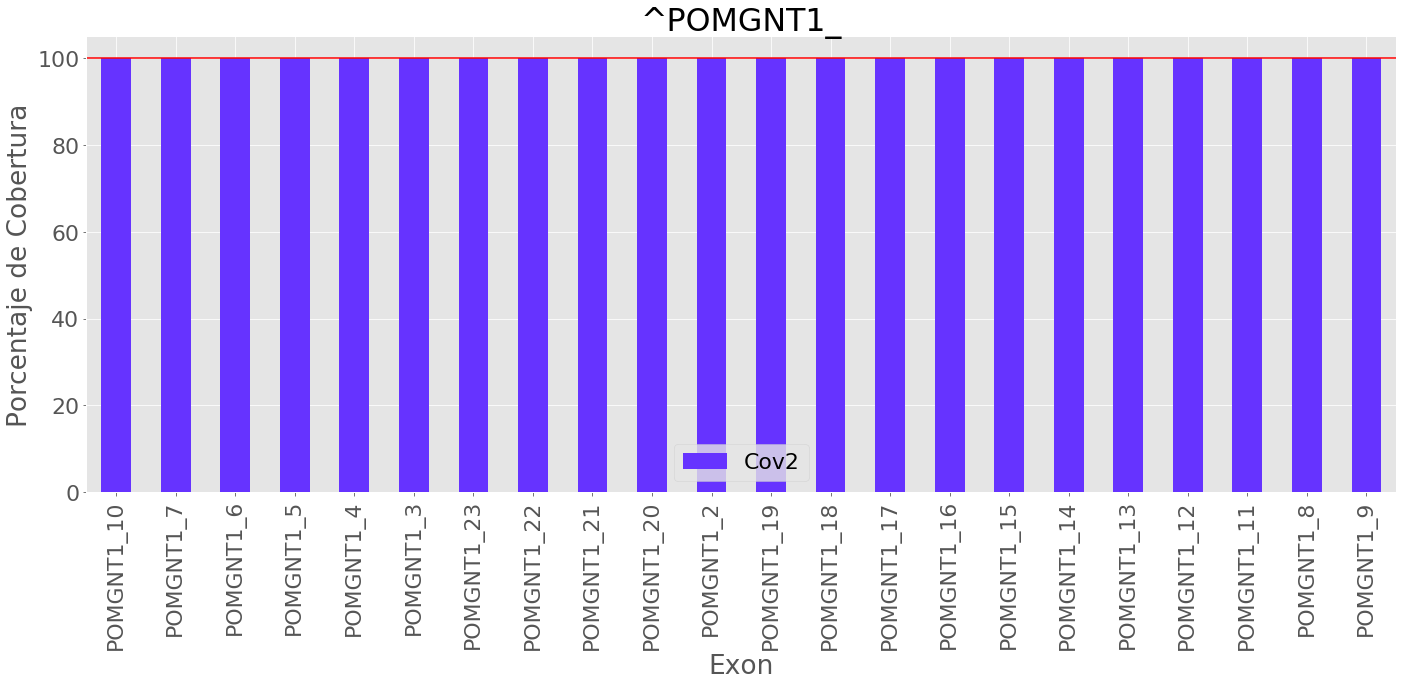

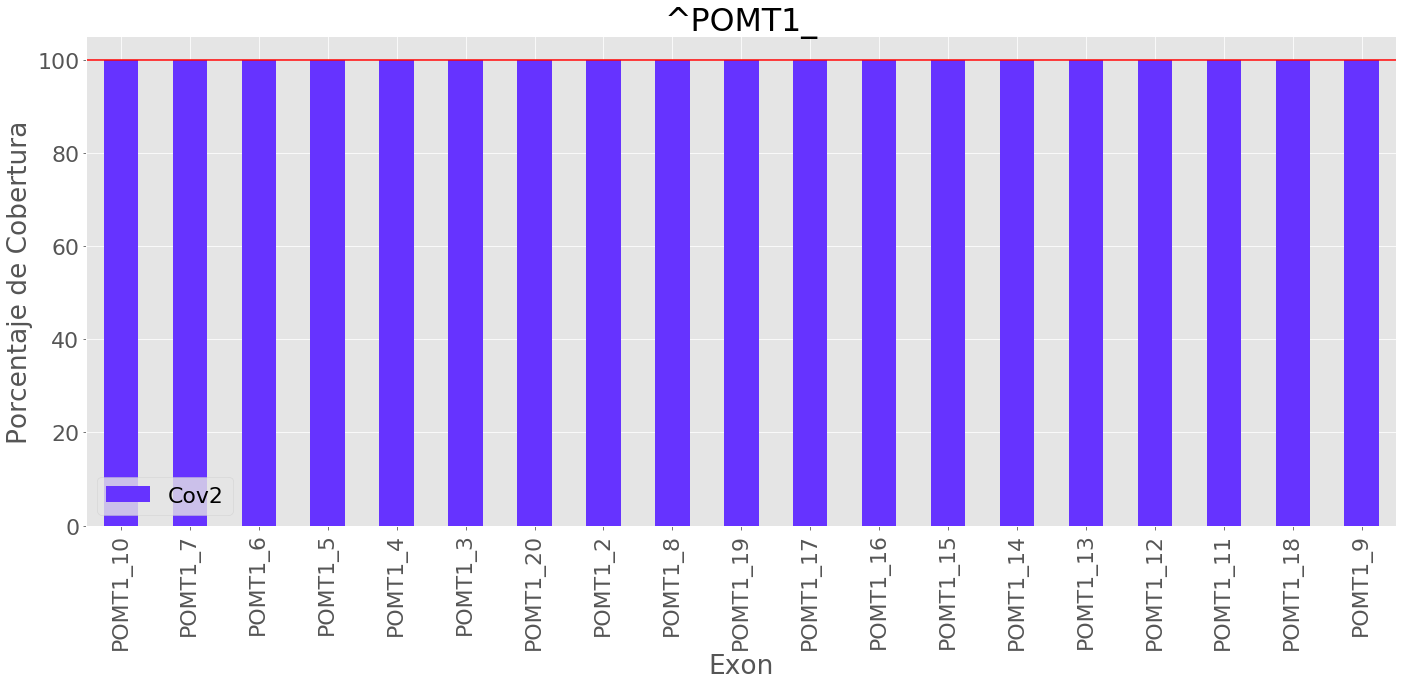

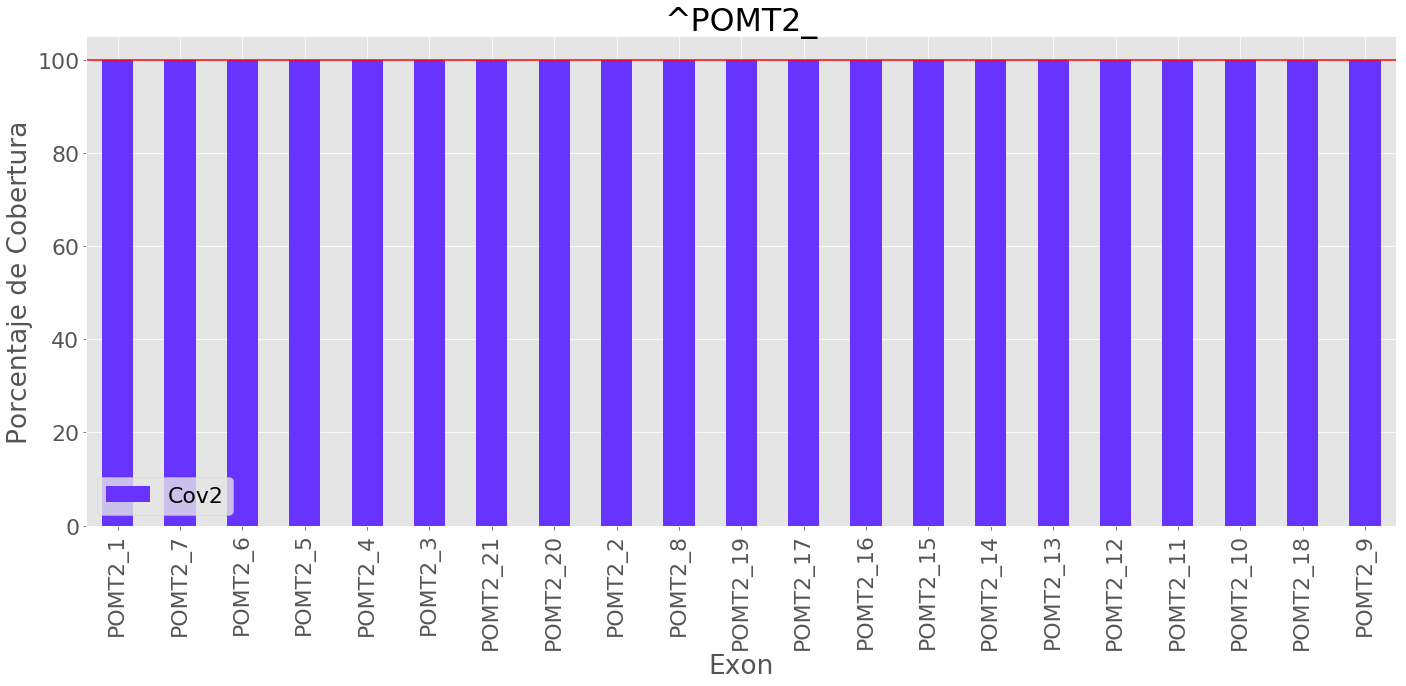

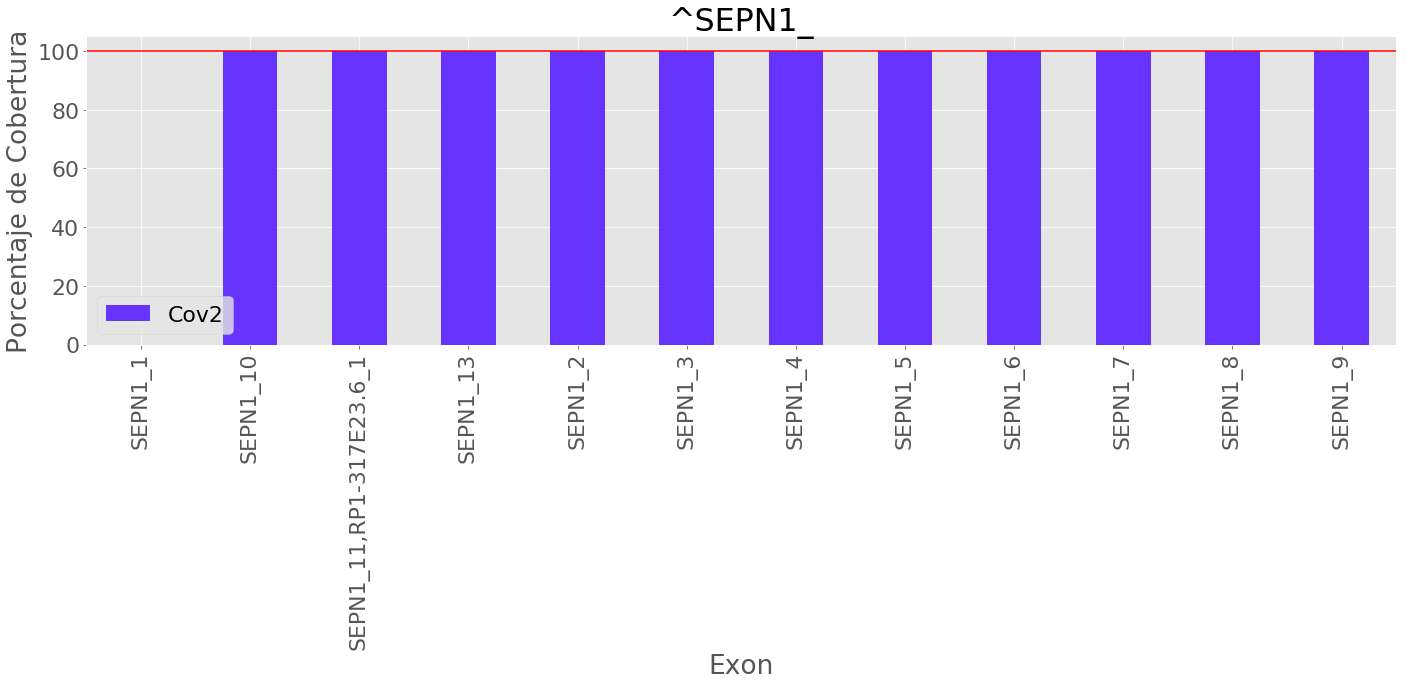

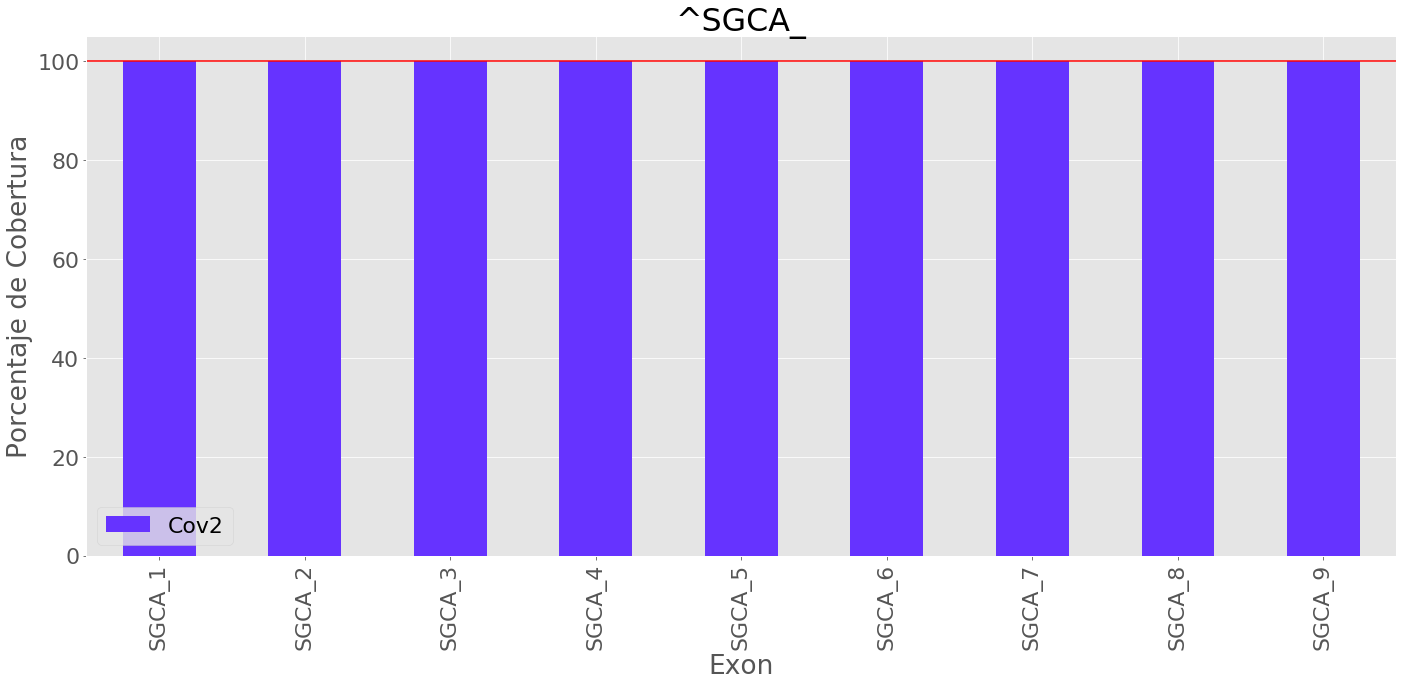

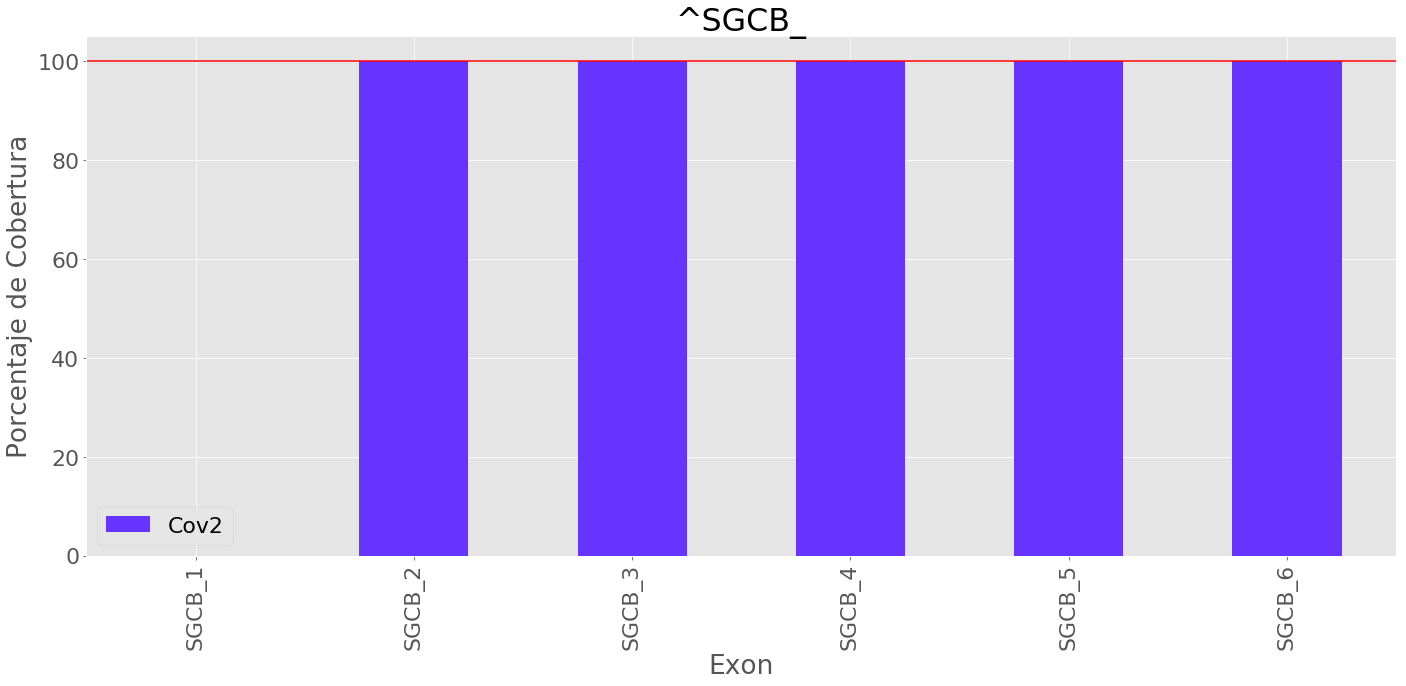

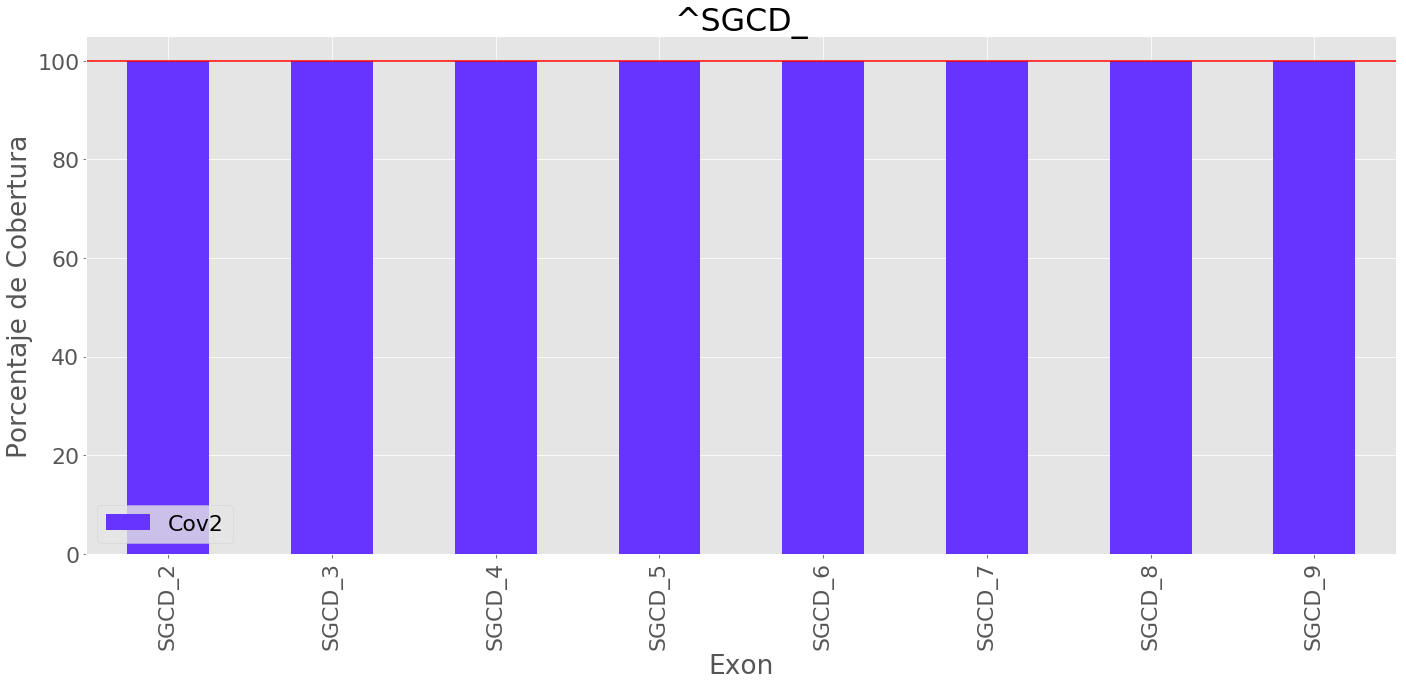

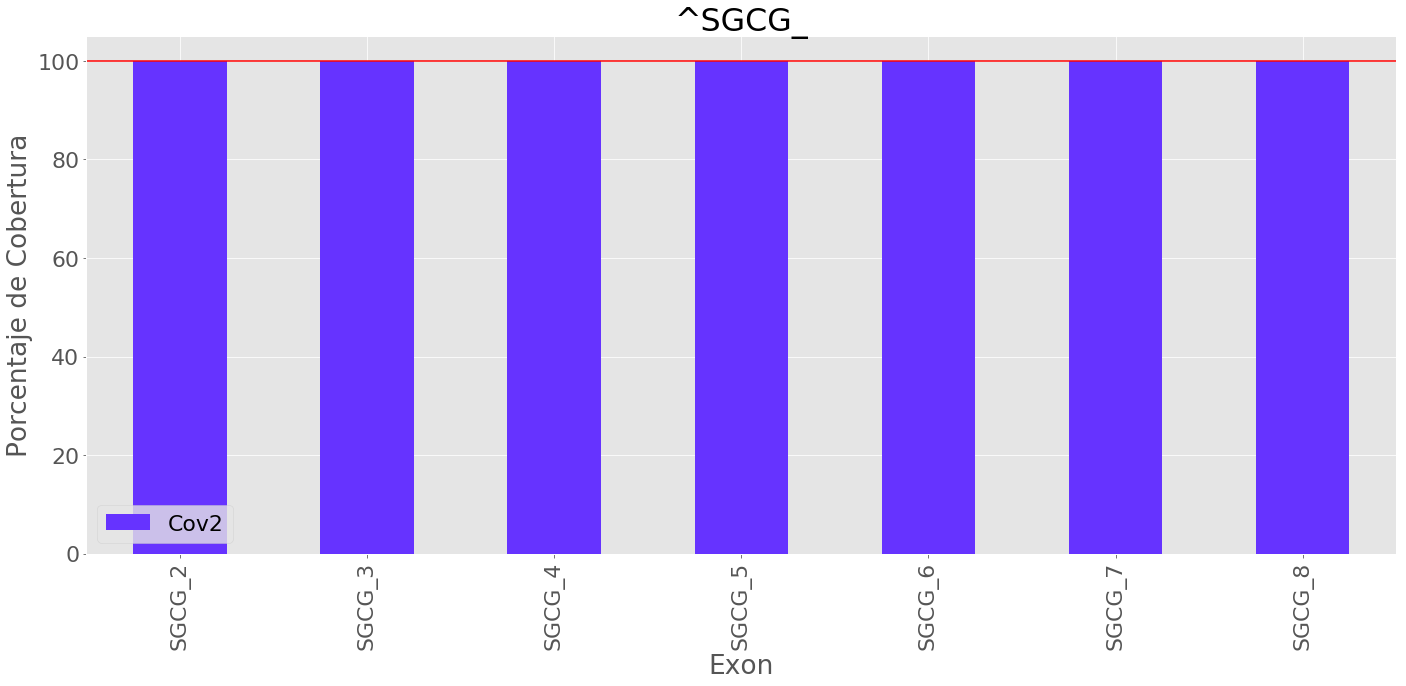

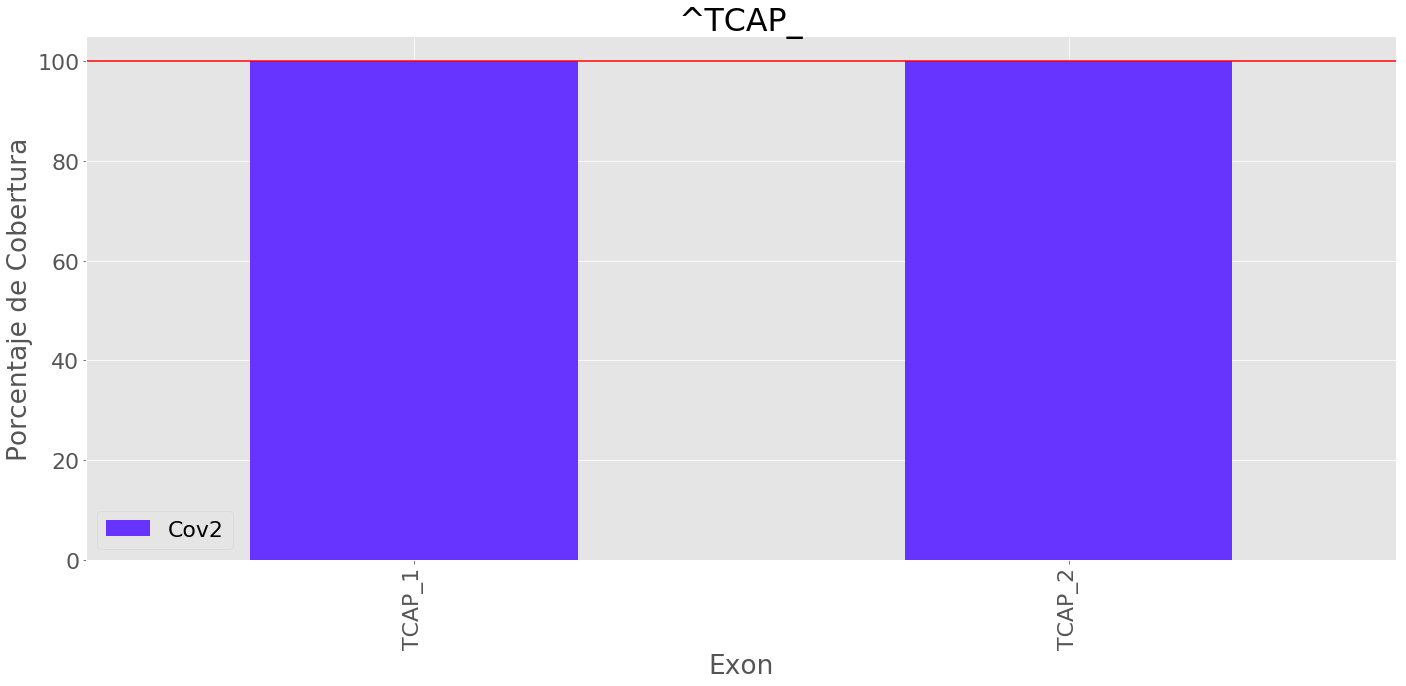

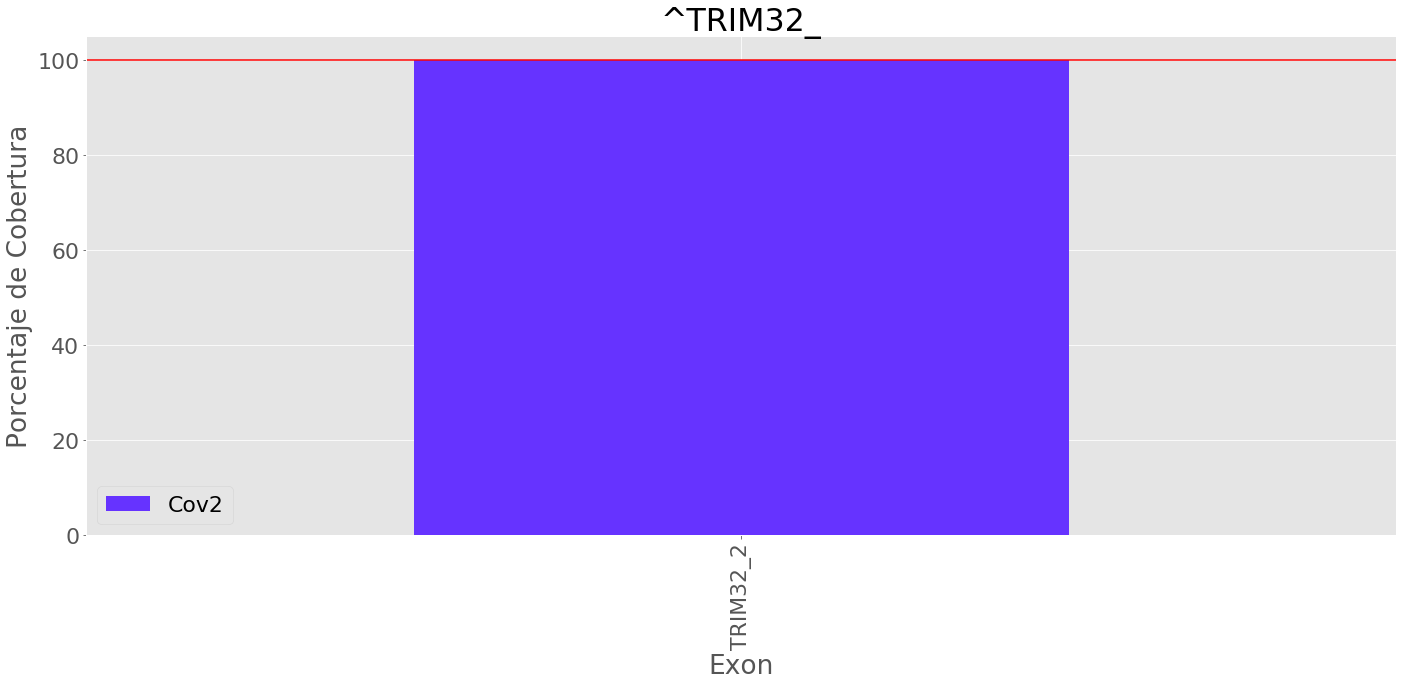

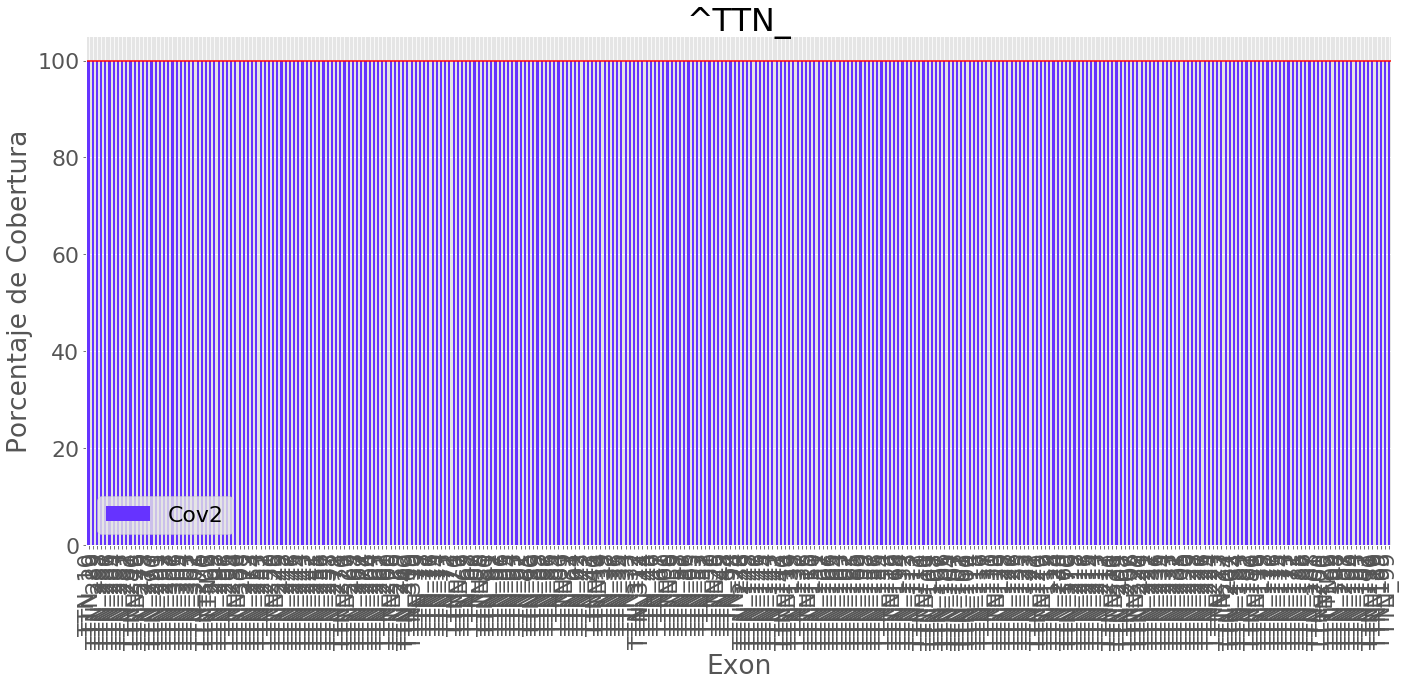

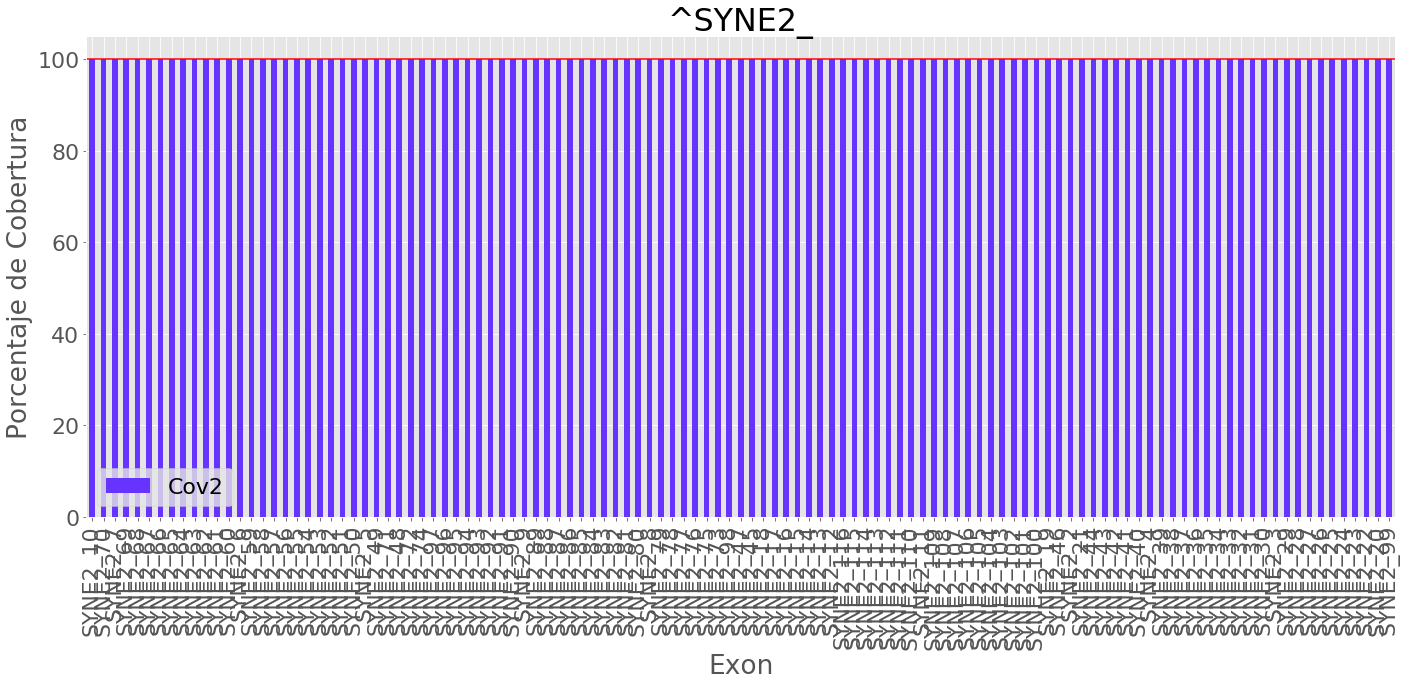

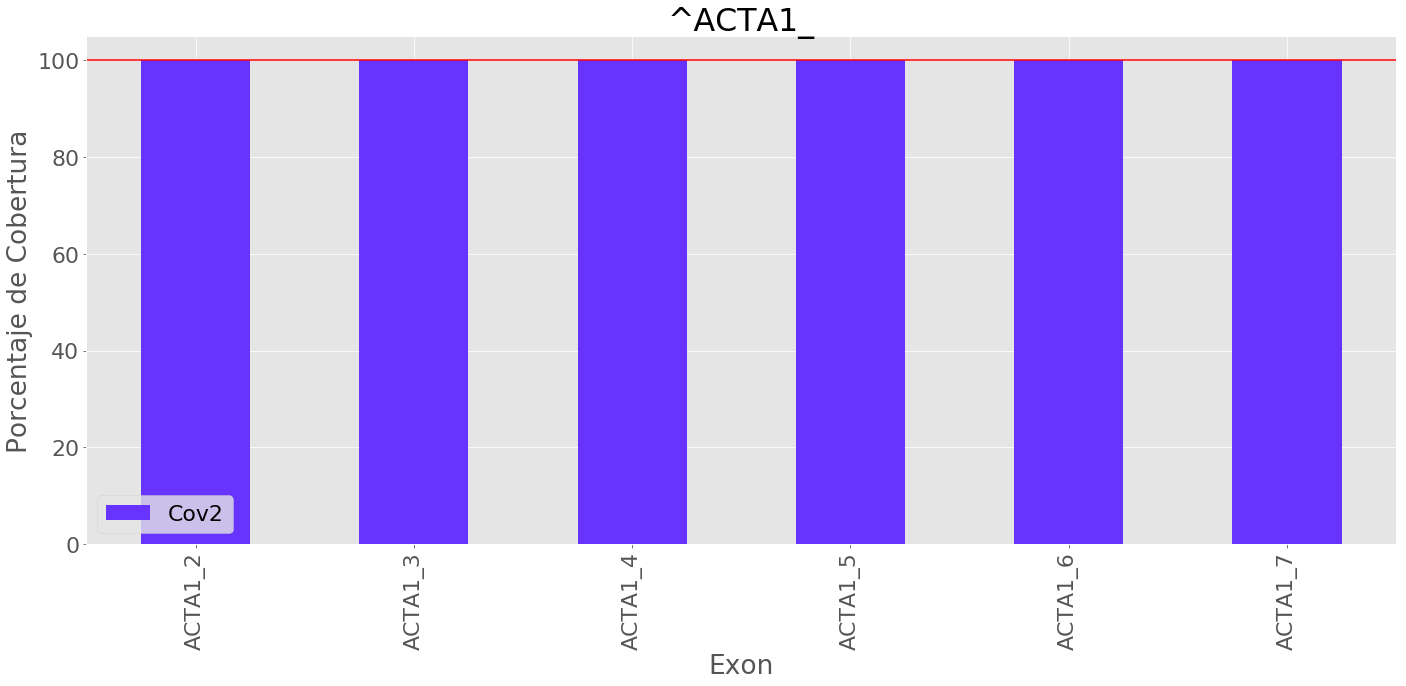

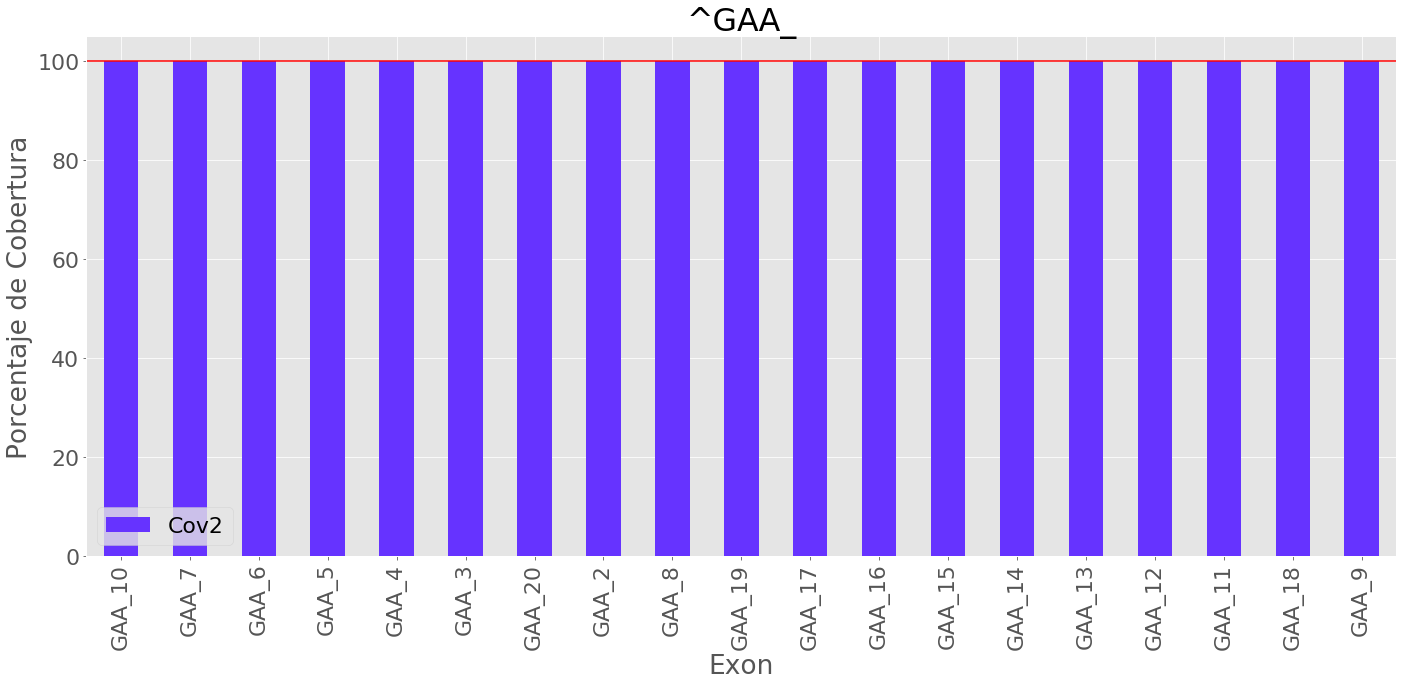

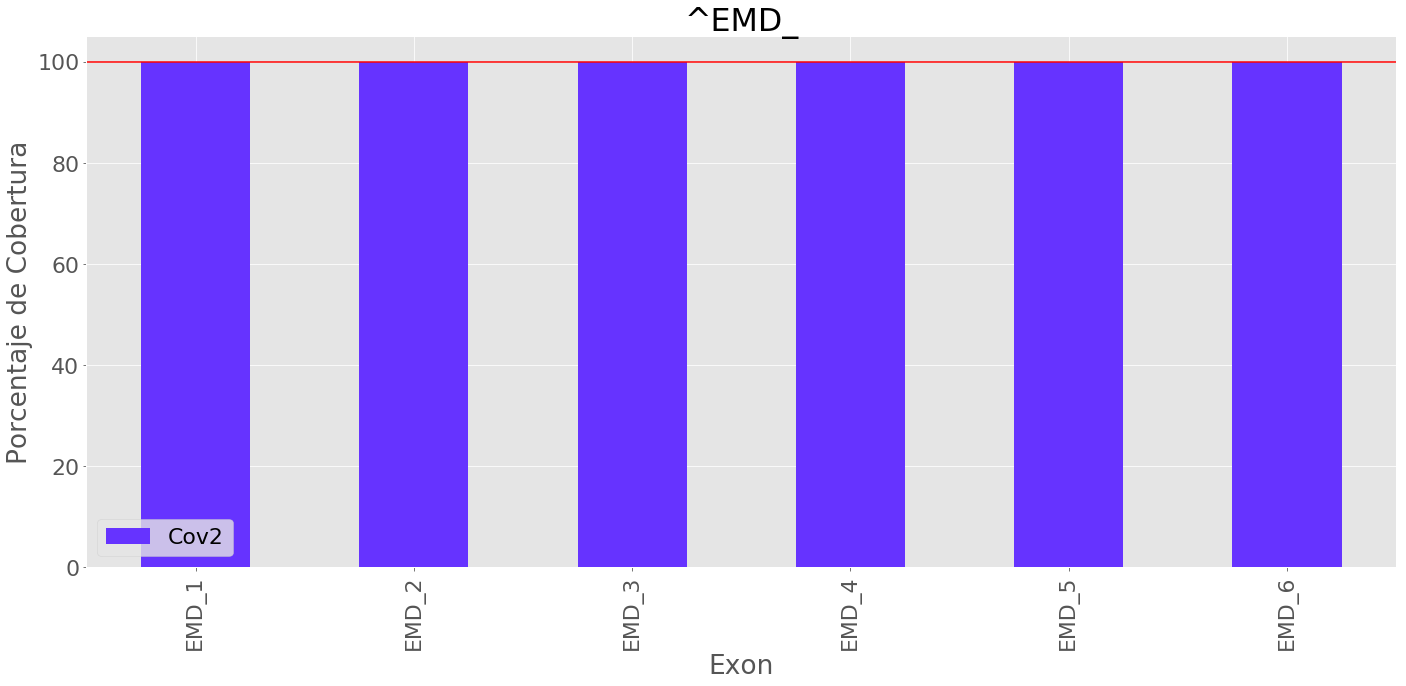

In [39]:
for g in g:
    porcentaje_cobertura(g)

In [42]:
#%%bash
#find *.png*|wc -l 

In [43]:
#%%bash
#rm *.png*

In [44]:
len(g)

7

In [54]:
n = input()                                

 SYNE2_


/home/genetix/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


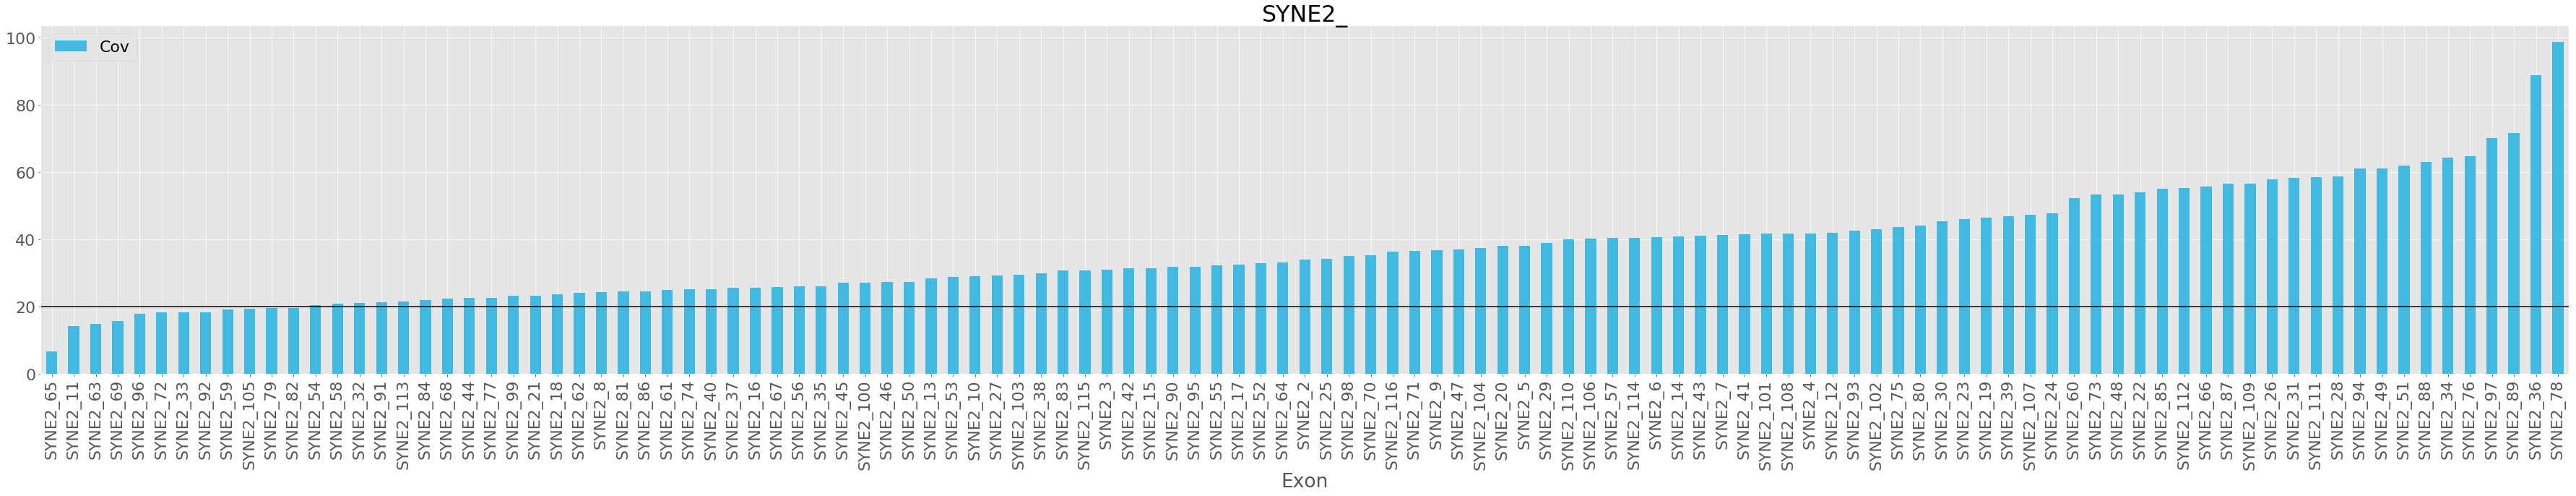

In [55]:
j = grafico_media(n)

/home/genetix/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


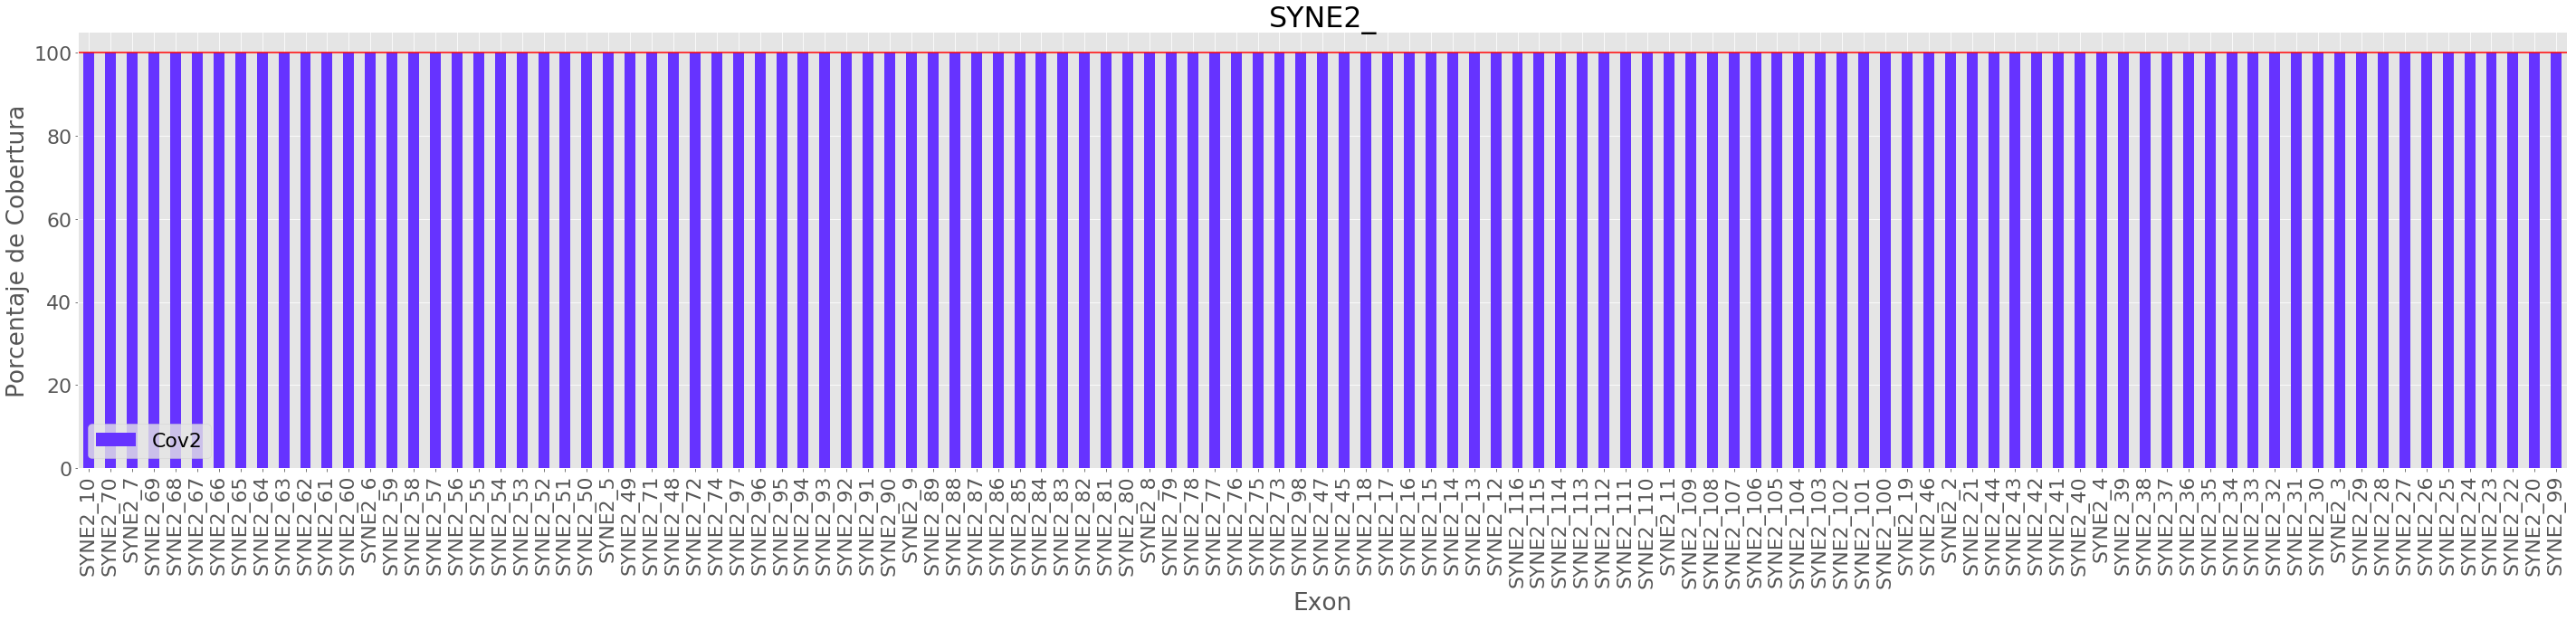

In [58]:
r = porcentaje_cobertura(n)

In [45]:
exon = input()

 SPG7_1


<Figure size 1440x720 with 0 Axes>

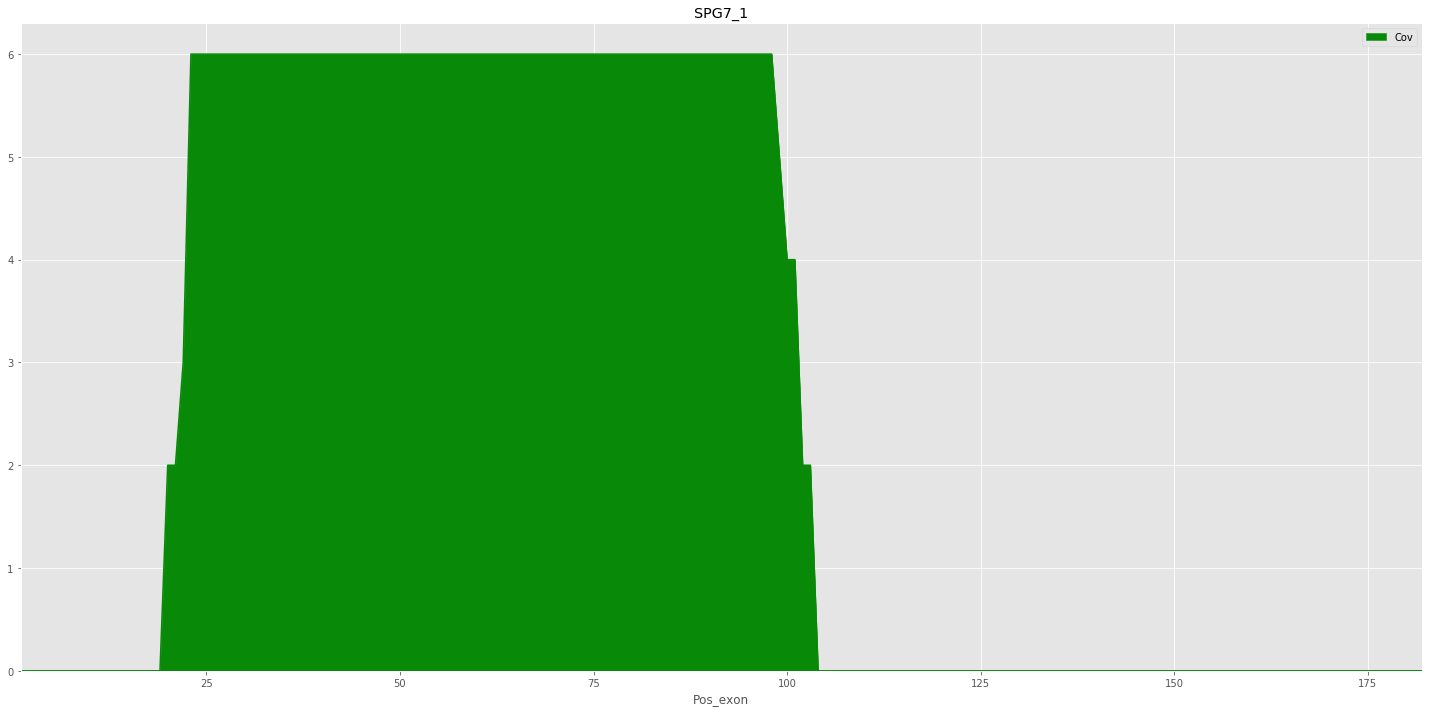

In [46]:
m = profundidad(exon)

In [60]:
%%bash
n=79202
convert /home/genetix/Escritorio/coberturas/${n}/*.png* /home/genetix/Escritorio/coberturas/${n}/IGV_${n}.pdf